<h1> Wohunngsanalyse </h1>

<p> Goals: Analyze a large housing market dataset in Germany, to get data driven insight around the housing market in this country. Build a machine learning model to predict house pricing in Germany based on several factors and compare it for the Bundesländer. </p>

The dataset was obtain from Kaggle under the following link:
https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

<h3> 1. Import Python Modules </h3>

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [2]:
#Let's check which pandas version we are using
pd.__version__

'1.1.3'

<h3> 2. Import Data </h3>

In [3]:
#Let's import the dataset 
housing= pd.read_csv("immo_data.csv")


In [4]:
# Now we let's see the first 5 rows as well as the existing columns
housing.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


<h3> 3. Preliminary analysis of the dataset: </h3>


In [5]:
#We could see a preview of the first five rows and some columns of the data set, but let's check  all the columns this dataset contains. 
housing.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

These columns represent the following information:
    
 * regio1: Bundesland (Federate State)
 * serviceCharge: auxiliary costs such as electricity or internet in euros
 *  heatingType: Type of heating
 * telekomTvOffer: Is payed TV included if so which offer
 * telekomHybridUploadSpeed: how fast is the hybrid inter upload speed
 * newlyConst: If the building is a recent construction
 * balcony: Does the property has a balcony?
 * picturecount: how many pictures were uploaded to the listing
 * pricetrend: price trend as calculated by Immoscout
 * telekomUploadSpeed: how fast is the internet upload speed
 * totalRent: total rent (usually a sum of base rent, service charge and heating cost)
 * yearConstructed: construction year
 * scoutid: immoscout Id
 * noParkSpaces: number of parking spaces
 * firingTypes: main energy sources, separated by colon
 * hasKitchen: does the property has a kitchen?
 * geo_bln: bundesland (state), same as regio1
 * cellar: does the property has a cellar?
 * yearConstructed: binned construction year, 1 to 9
 * baseRent: base rent without electricity and heating
 * houseNumber: house number
 * livingSpace: living space in sqm
 * geo_krs: district, above ZIP code
 * condition: condition of the flat 
 * interiorQual: interior quality
 * petsAllowed: are pets allowed, yes/no or negotiable
 * street: street name
 * streetPlain: street name (plain, different formating)
 * lift: is elevator available?
 * baseRentRange: binned base rent, 1 to 9
 * typeOfFlat: type of flat
 * geo_plz: ZIP code
 * noRooms: number of rooms
 * thermalChar: energy need in kWh/m^2a, defines the energy efficiency class
 * floor: which floor is the flat on
 * numberOfFloors: number of floors in the building
 * noRoomsRange: binned number of rooms, 1 to 5
 * garden: does the property has a garden
 * livingSpaceRange: binned living space, 1 to 7
 * regio2: District or Kreis, same as geo krs
 * regio3: City/town
 * description: free text description of the object 
 * facilities: free text description about available facilities
 * heatingCosts: monthly heating costs in euros
 * energyEfficiency: energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)
 * lastRefurbish: year of last renovation
 * electricityBasPrice: monthly base price for electricity in euro (deprectaded since Feb 2020)
 * electricityKwhPrice: electricity price peer kwh (deprecated since Feb 2020)
 * date: time of scraping
 

In [6]:
# Now let's check more info on the number of rows columns and the type of data on them
print(housing.shape)
print(housing.info())

(268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052

<p> We have 49 columns and 268,850 rows in the dataset, from which 6 columns are yes or no (booleans) , 18 have values with decimal points (floats) , 6 have integer numbers (int) , and 19 are marked as object (strings). Now let's check which of the columns have 0 values in them: </p>

In [7]:
housing.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

<AxesSubplot:>

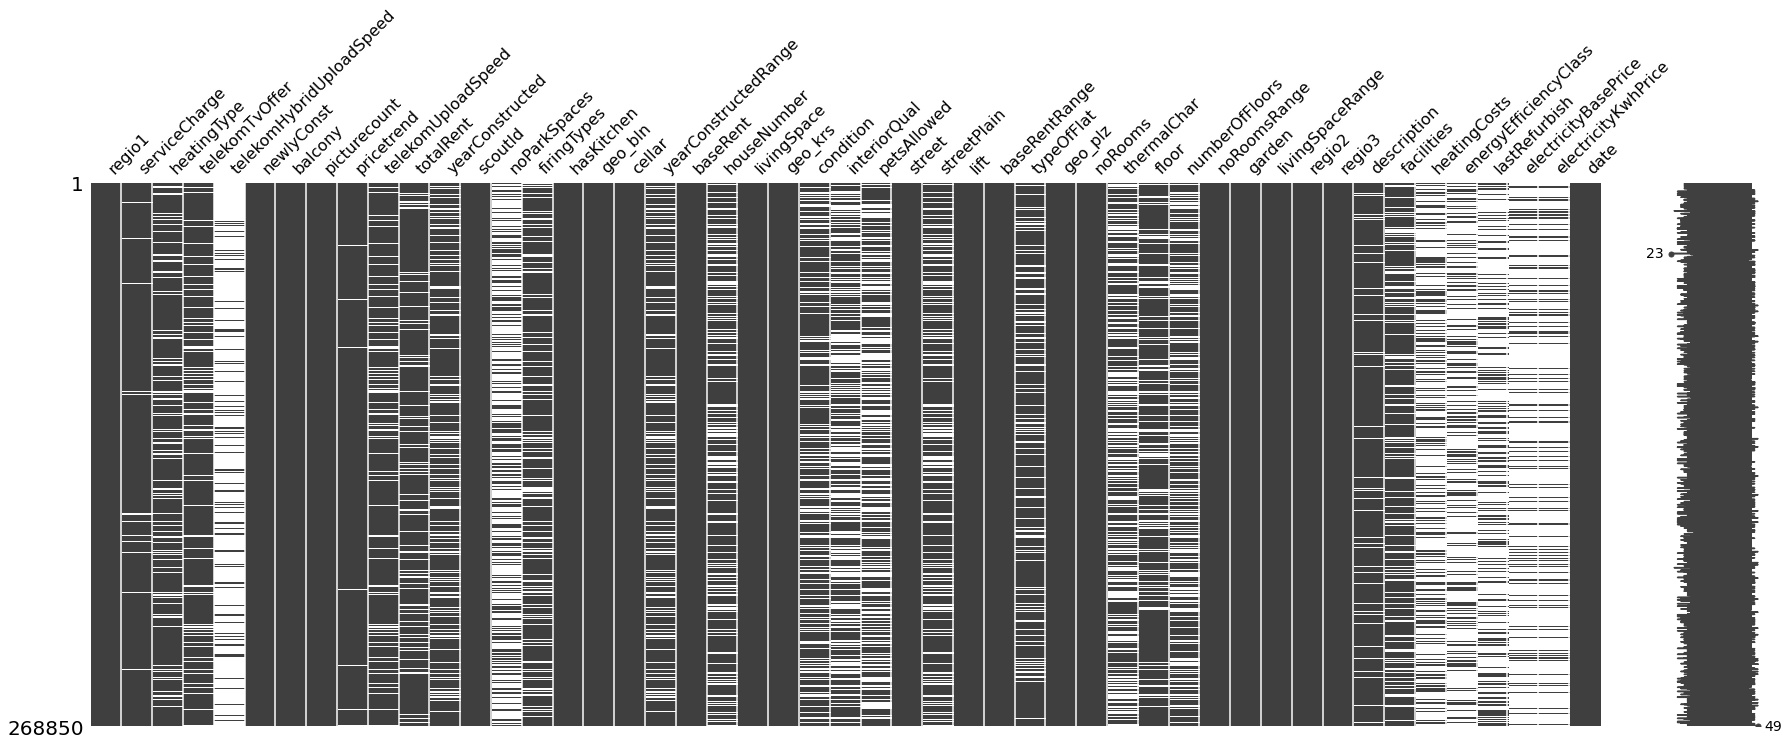

In [8]:
#Plot graphic of missing values (if there is any missing data)
import missingno
missingno.matrix(housing,figsize =(30,10))

<h2> Data Cleaning and Tyding </h2>

Some columns contain may 0 values, especially the last ones on the dataset like heating costs, electricity base price, etc. Let's have a better visual of this. With this matrix we can quickly see which columns have missing data. We can see for example that for <b> noParkSpaces </b>  there are a lot of missing values, as well as for the last five columns before date. So now we will modifiy the dataset to be able to work better with it.

In this case we are making a new subset from the data set, dropping certain columns with missing values, so we can work the dataset better and get more accurate results.

In [9]:
#Making a new data set keeping the columns I am interested in
housing_subset= housing[['regio1', 'serviceCharge', 'heatingType','newlyConst', 'balcony',  'totalRent', 'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',  'baseRent',  'livingSpace',  'condition', 'interiorQual', 'petsAllowed','lift',  'typeOfFlat',  'noRooms',  'floor', 'numberOfFloors',  'noRoomsRange', 'garden',   'heatingCosts', 'energyEfficiencyClass','lastRefurbish', 'electricityBasePrice', 'date']]


In [10]:
#Let's describe it to get a general feeling of the dataset to see a general picture 

housing_subset.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,261941.000000,2.283330e+05,211805.000000,93052.000000,2.688500e+05,268850.000000,268850.000000,217541.000000,171118.000000,268850.000000,85518.000000,80711.000000,46846.000000
mean,151.206113,9.013315e+02,1966.400590,1.327634,6.941294e+02,74.355548,2.641261,2.122405,3.572319,2.571542,76.990866,2013.904536,89.113612
std,308.295790,3.323833e+04,46.992207,8.361403,1.953602e+04,254.759208,2.633440,3.634934,6.375496,0.937594,147.716278,10.963125,5.395805
min,0.000000,0.000000e+00,1000.000000,0.000000,0.000000e+00,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000
25%,95.000000,4.698000e+02,1950.000000,1.000000,3.380000e+02,54.000000,2.000000,1.000000,2.000000,2.000000,54.000000,2012.000000,90.760000
50%,135.000000,6.500000e+02,1973.000000,1.000000,4.900000e+02,67.320000,3.000000,2.000000,3.000000,3.000000,70.000000,2017.000000,90.760000
75%,190.000000,9.850000e+02,1996.000000,1.000000,7.990000e+02,87.000000,3.000000,3.000000,4.000000,3.000000,90.000000,2019.000000,90.760000
max,146118.000000,1.575154e+07,2090.000000,2241.000000,9.999999e+06,111111.000000,999.990000,999.000000,999.000000,5.000000,12613.000000,2919.000000,90.760000


<p> The dataset looks better, however we still have some missing values, and some outliers which might affect our calculations at a later point </p>

In [11]:
#are there missing values in the sub set ?
housing_subset.isna().sum()

regio1                        0
serviceCharge              6909
heatingType               44856
newlyConst                    0
balcony                       0
totalRent                 40517
yearConstructed           57045
noParkSpaces             175798
firingTypes               56964
hasKitchen                    0
geo_bln                       0
cellar                        0
baseRent                      0
livingSpace                   0
condition                 68489
interiorQual             112665
petsAllowed              114573
lift                          0
typeOfFlat                36614
noRooms                       0
floor                     51309
numberOfFloors            97732
noRoomsRange                  0
garden                        0
heatingCosts             183332
energyEfficiencyClass    191063
lastRefurbish            188139
electricityBasePrice     222004
date                          0
dtype: int64

In [12]:
# Let's take a look at housing subset 
housing_subset[housing_subset.isnull().any(axis=1)]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,595.0,86.00,well_kept,normal,NaN,False,ground_floor,4.0,1.0,3.0,4,True,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,2.0,gas,False,Rheinland_Pfalz,False,800.0,89.00,refurbished,normal,no,False,ground_floor,3.0,NaN,NaN,3,False,NaN,NaN,2019.0,NaN,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,1.0,NaN,False,Sachsen,True,965.0,83.80,first_time_use,sophisticated,NaN,True,apartment,3.0,3.0,4.0,3,False,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,NaN,district_heating,False,Sachsen,False,343.0,58.15,NaN,NaN,NaN,False,other,3.0,3.0,NaN,3,False,87.23,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,NaN,gas,False,Bremen,False,765.0,84.97,refurbished,NaN,NaN,False,apartment,3.0,1.0,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,False,True,910.0,2016.0,1.0,geothermal,False,Bayern,True,820.0,90.00,mint_condition,sophisticated,no,False,roof_storey,3.0,NaN,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,False,True,1150.0,1983.0,1.0,gas,True,Hessen,False,930.0,115.00,well_kept,sophisticated,negotiable,False,apartment,3.5,1.0,1.0,3,False,NaN,NaN,2015.0,NaN,May19
268847,Hessen,220.00,central_heating,False,True,930.0,1965.0,1.0,gas,False,Hessen,True,650.0,95.00,well_kept,NaN,negotiable,False,apartment,4.0,1.0,2.0,4,True,NaN,NaN,2019.0,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,840.0,70.00,first_time_use,sophisticated,no,True,apartment,2.0,NaN,5.0,2,False,40.00,NO_INFORMATION,2019.0,NaN,May19


<p> I want to know the most frequent value for electricity base price  </p>

<AxesSubplot:>

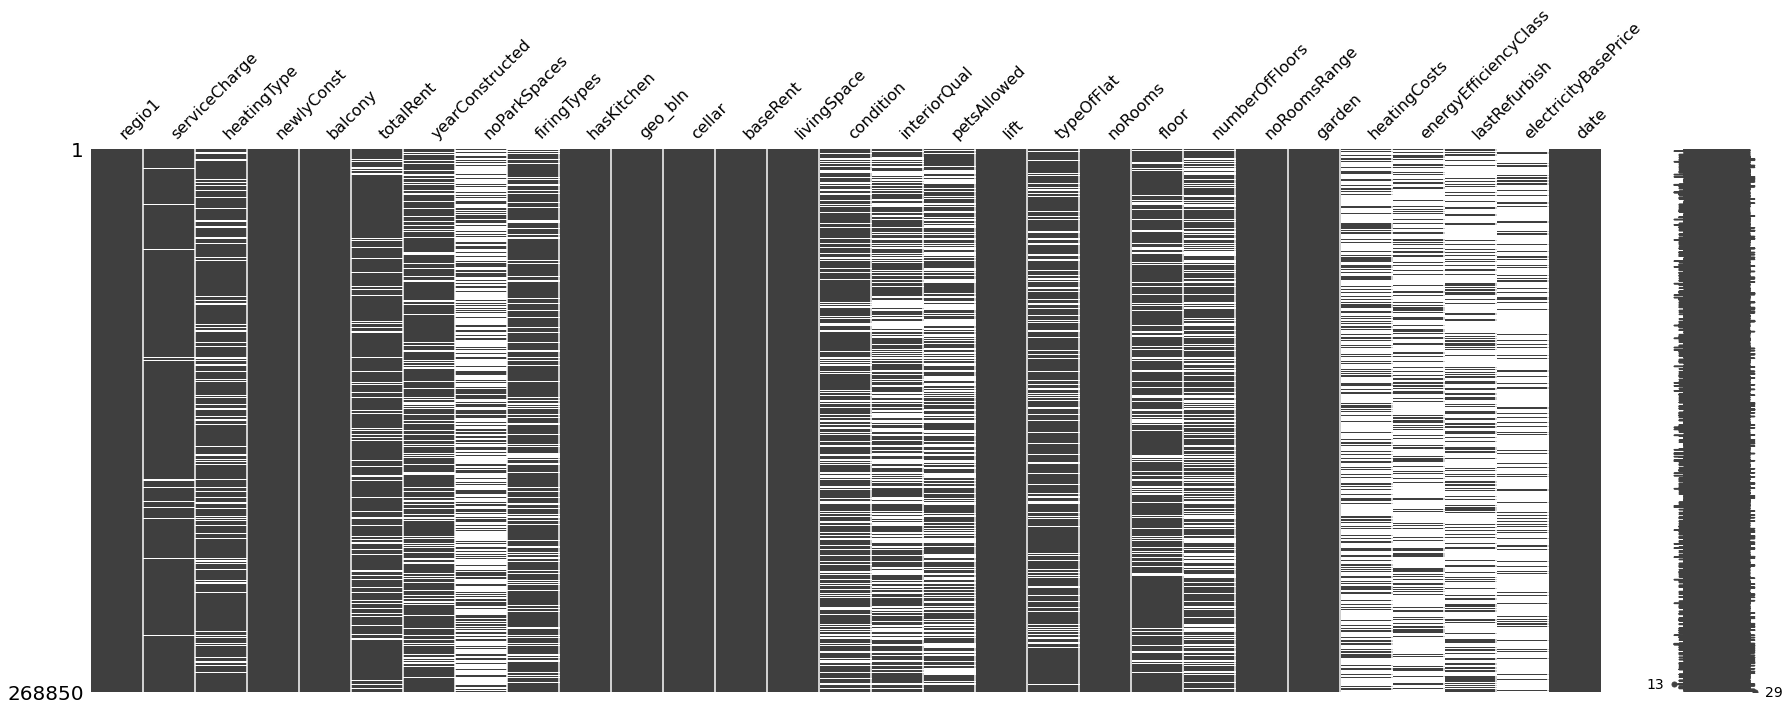

In [13]:
#Plot graphic of missing values (if there is any missing data)
import missingno
missingno.matrix(housing_subset,figsize =(30,10))

In [14]:
#housing_subset['yearConstructed'].mode()
#housing_subset['floor'].mode()
#housing_subset['numberOfFloors'].mode()
#housing_subset['heatingCosts'].mean()
#housing_subset['energyEfficiencyClass'].mode()
#housing_subset['lastRefurbish'].mode()
housing_subset['electricityBasePrice'].mean()


89.11361183442983

In [15]:
#let's also check some summary statistics for the service charge column
housing_subset['serviceCharge'].describe()

count    261941.000000
mean        151.206113
std         308.295790
min           0.000000
25%          95.000000
50%         135.000000
75%         190.000000
max      146118.000000
Name: serviceCharge, dtype: float64

<p> We are droping all missing values from the Dataset to see how it would look like, and how much would it change the summary statistics from the original one </p> 

In [16]:
housing_ohne_nan = housing_subset.dropna()

In [17]:
#Lets describe this dataset without missing values
housing_ohne_nan.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,132.031234,940.245649,1972.129870,1.616883,736.992662,84.241169,2.879870,1.870130,3.181818,2.844156,86.672857,2013.389610,89.504805
std,78.113656,555.489670,40.021677,3.778505,478.135756,30.610051,0.846089,1.336767,1.340444,0.833372,48.093261,5.891516,4.778670
min,26.000000,0.000000,1880.000000,0.000000,185.600000,35.240000,1.000000,0.000000,0.000000,1.000000,0.000000,1995.000000,71.430000
25%,80.000000,536.250000,1955.000000,1.000000,380.000000,63.152500,2.000000,1.000000,2.000000,2.000000,60.000000,2011.000000,90.760000
50%,110.000000,850.500000,1978.500000,1.000000,658.500000,77.735000,3.000000,2.000000,3.000000,3.000000,80.000000,2016.000000,90.760000
75%,170.000000,1150.000000,2012.000000,1.000000,909.607500,100.750000,3.000000,3.000000,4.000000,3.000000,100.000000,2018.000000,90.760000
max,490.000000,3755.000000,2018.000000,31.000000,3200.000000,253.000000,5.000000,6.000000,7.000000,5.000000,280.000000,2018.000000,90.760000


In [18]:
#Let's calculate the most frequent value for all columns in housing_subset through iteration 
modes=[]
for col in housing_subset.columns:
    top_values=[]
    top_values=housing_subset[col].mode()
    modes.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
    pd.concat(modes, axis=1)
   

In [19]:
#Let's print it and check the values 
display(modes)

[                regio1
 0  Nordrhein_Westfalen,
    serviceCharge
 0          150.0,
        heatingType
 0  central_heating,
    newlyConst
 0       False,
    balcony
 0     True,
    totalRent
 0      500.0,
    yearConstructed
 0           2019.0,
    noParkSpaces
 0           1.0,
   firingTypes
 0         gas,
    hasKitchen
 0       False,
                geo_bln
 0  Nordrhein_Westfalen,
    cellar
 0    True,
    baseRent
 0     350.0,
    livingSpace
 0         60.0,
    condition
 0  well_kept,
   interiorQual
 0       normal,
   petsAllowed
 0  negotiable,
     lift
 0  False,
   typeOfFlat
 0  apartment,
    noRooms
 0      3.0,
    floor
 0    1.0,
    numberOfFloors
 0             3.0,
    noRoomsRange
 0             3,
    garden
 0   False,
    heatingCosts
 0          60.0,
   energyEfficiencyClass
 0                     C,
    lastRefurbish
 0         2019.0,
    electricityBasePrice
 0                 90.76,
     date
 0  Feb20]

<p> Let's keep trying to tidy the dataset, this time I will replace the missing values using a dictionary with the mode (most frequent value) or 0 </p>

In [20]:
tidy_housing= housing_subset.fillna({'serviceCharge':0, 'heatingType': 'unknown', 'totalRent': 940, 'yearConstructed': 2017, 'noParkSpaces': 0,'firingTypes': 'unknown', 'condition':'unknown', 'petsAllowed':'no','typeOfFlat':'unknown', 'floor':1, 'numberOfFloors': 3, 'heatingCosts':86,'energyEfficiencyClass':'NO_INFORMATION','lastRefurbish':2018,'electricityBasePrice':90,'interiorQual':'normal'})
tidy_housing.isna().sum()

regio1                   0
serviceCharge            0
heatingType              0
newlyConst               0
balcony                  0
totalRent                0
yearConstructed          0
noParkSpaces             0
firingTypes              0
hasKitchen               0
geo_bln                  0
cellar                   0
baseRent                 0
livingSpace              0
condition                0
interiorQual             0
petsAllowed              0
lift                     0
typeOfFlat               0
noRooms                  0
floor                    0
numberOfFloors           0
noRoomsRange             0
garden                   0
heatingCosts             0
energyEfficiencyClass    0
lastRefurbish            0
electricityBasePrice     0
date                     0
dtype: int64

In [21]:
#Let's describe this new tidy dataset 
tidy_housing.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,268850.000000,2.688500e+05,268850.000000,268850.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000
mean,147.320366,9.071590e+02,1977.136850,0.459509,6.941294e+02,74.355548,2.641261,1.908198,3.364270,2.571542,83.134301,2016.770508,89.845551
std,305.247775,3.063151e+04,46.558511,4.959480,1.953602e+04,254.759208,2.633440,3.299345,5.093796,0.937594,83.416215,6.293287,2.277296
min,0.000000,0.000000e+00,1000.000000,0.000000,0.000000e+00,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000
25%,90.000000,4.950000e+02,1958.000000,0.000000,3.380000e+02,54.000000,2.000000,1.000000,3.000000,2.000000,86.000000,2018.000000,90.000000
50%,131.000000,7.410000e+02,1986.000000,0.000000,4.900000e+02,67.320000,3.000000,1.000000,3.000000,3.000000,86.000000,2018.000000,90.000000
75%,185.000000,9.400000e+02,2017.000000,1.000000,7.990000e+02,87.000000,3.000000,3.000000,4.000000,3.000000,86.000000,2018.000000,90.000000
max,146118.000000,1.575154e+07,2090.000000,2241.000000,9.999999e+06,111111.000000,999.990000,999.000000,999.000000,5.000000,12613.000000,2919.000000,90.760000


<h3> Outliers </h3> 

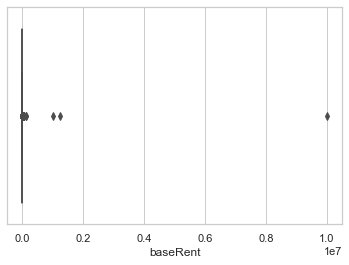

In [22]:
#Let's have a better view of the outliers in the housing subset 
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=housing_subset["baseRent"])

the scale for the Base Rent is too big, it seems that there is a property with a huge rent price that is creating this effect

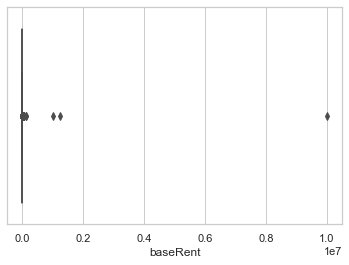

In [23]:
#Let's check now how it is for the tidy dataset
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=tidy_housing["baseRent"])

In [24]:
#Boxplot method 2 

In [25]:
# define a function called "plot_boxplot"

def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

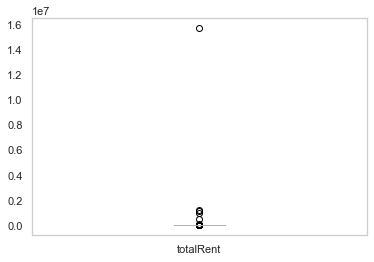

In [26]:
plot_boxplot(tidy_housing,'totalRent')

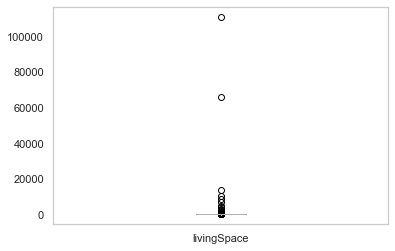

In [27]:
plot_boxplot(tidy_housing,'livingSpace')

we see the same outlier in the tidy dataset

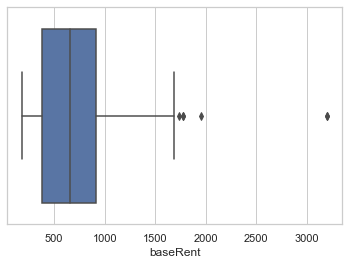

In [28]:
#So let's check how is it for the dataset without the missing values
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=housing_ohne_nan["baseRent"])

The values in this data set are much more closer to each other, after we drop the Nan for all colums, there are still though some outliers that go over 3000 eur in the rent, so we will work with quantile to remove some outliers

In [29]:
#Remove the outliers from all the colums

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3- Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls 

In [30]:
# create an empty list to store the output indices from multiple columns (tidy_housing dataset)

index_list = []
for feature in ['serviceCharge','totalRent','yearConstructed','noParkSpaces','livingSpace','noRooms','baseRent','floor','numberOfFloors','noRoomsRange','heatingCosts','lastRefurbish','electricityBasePrice']:
    index_list.extend(outliers(tidy_housing, feature))

In [31]:
# create an empty list to store the output indices from multiple columns ((housing_ohne_nan dataset))

index_list_h = []
for feature in ['serviceCharge','totalRent','yearConstructed','noParkSpaces','livingSpace','noRooms','baseRent','floor','numberOfFloors','noRoomsRange','heatingCosts','lastRefurbish','electricityBasePrice']:
    index_list.extend(outliers(housing_ohne_nan, feature))

In [32]:
# define a function called "remove" which returns a cleaned dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df= df.drop(ls)
    return df

In [33]:
tidy_housing_cleaned = remove(tidy_housing, index_list)

In [34]:
#Let's check the cleaned tidy housing 
tidy_housing_cleaned.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,86370.000000,86370.000000,86370.000000,86370.000000,86370.000000,86370.000000,86370.000000,86370.000000,86370.000000,86370.000000,86370.0,86370.0,86370.0
mean,140.472557,740.007095,1983.729594,0.373127,559.615305,67.241756,2.426276,1.657775,3.146162,2.386315,86.0,2018.0,90.0
std,64.772997,305.149036,39.691679,0.537238,287.578737,23.373143,0.838781,1.112861,0.732793,0.832331,0.0,0.0,0.0
min,0.000000,0.000000,1870.000000,0.000000,0.000000,5.000000,1.000000,-1.000000,2.000000,1.000000,86.0,2018.0,90.0
25%,100.000000,480.000000,1961.000000,0.000000,330.000000,51.590000,2.000000,1.000000,3.000000,2.000000,86.0,2018.0,90.0
50%,140.000000,714.000000,1997.000000,0.000000,480.000000,65.000000,2.000000,1.000000,3.000000,2.000000,86.0,2018.0,90.0
75%,180.000000,940.000000,2017.000000,1.000000,740.000000,82.000000,3.000000,2.000000,3.000000,3.000000,86.0,2018.0,90.0
max,327.000000,1607.220000,2090.000000,2.000000,1490.000000,136.500000,4.500000,6.000000,5.000000,4.000000,86.0,2018.0,90.0


In [35]:
tidy_housing_cleaned .shape

(86370, 29)

In [36]:
tidy_housing_nan = remove(housing_ohne_nan, index_list_h)

In [37]:
#Let's check the tidy housing withouth the NaN values 
tidy_housing_nan.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,132.031234,940.245649,1972.129870,1.616883,736.992662,84.241169,2.879870,1.870130,3.181818,2.844156,86.672857,2013.389610,89.504805
std,78.113656,555.489670,40.021677,3.778505,478.135756,30.610051,0.846089,1.336767,1.340444,0.833372,48.093261,5.891516,4.778670
min,26.000000,0.000000,1880.000000,0.000000,185.600000,35.240000,1.000000,0.000000,0.000000,1.000000,0.000000,1995.000000,71.430000
25%,80.000000,536.250000,1955.000000,1.000000,380.000000,63.152500,2.000000,1.000000,2.000000,2.000000,60.000000,2011.000000,90.760000
50%,110.000000,850.500000,1978.500000,1.000000,658.500000,77.735000,3.000000,2.000000,3.000000,3.000000,80.000000,2016.000000,90.760000
75%,170.000000,1150.000000,2012.000000,1.000000,909.607500,100.750000,3.000000,3.000000,4.000000,3.000000,100.000000,2018.000000,90.760000
max,490.000000,3755.000000,2018.000000,31.000000,3200.000000,253.000000,5.000000,6.000000,7.000000,5.000000,280.000000,2018.000000,90.760000


Let's plot the boxplot again to see if it is still plotting the outliers 

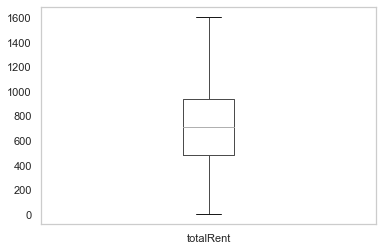

In [38]:
plot_boxplot(tidy_housing_cleaned ,'totalRent')

In this case the outliers were removed and the rent range is much smaller, we can see that the rent mean would be around 700 with the maximum value lying around 1600 

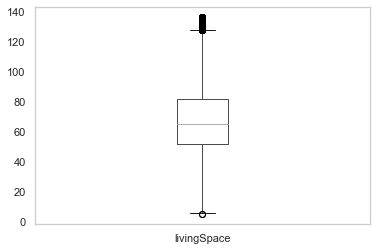

In [39]:
plot_boxplot(tidy_housing_cleaned ,'livingSpace')

for the living Space the mean would be around 60, we have several points over 120 meters 

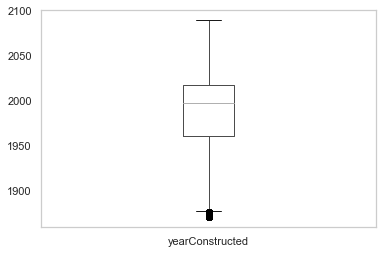

In [40]:
plot_boxplot(tidy_housing_cleaned , 'yearConstructed')

Here we have some properties that were built before 1900s, which are the points belove the plot range, our mean would be around the year 2000

<h2> Summary Statistics </h2> 

(154, 29)


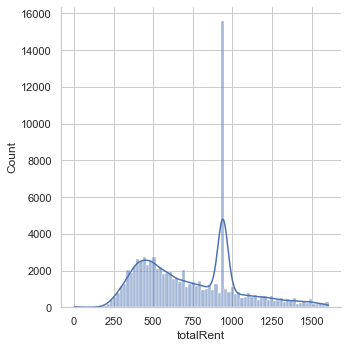

In [41]:
#sns.histplot(housing_ohne_nan.totalRent)
sns.displot(data=tidy_housing_cleaned, x="totalRent", kde=True)
print(housing_ohne_nan.shape)

In [42]:
print(tidy_housing_cleaned.totalRent.mean(),tidy_housing_cleaned.totalRent.median())

740.007095171934 714.0


We see there are two peaks for this data, one around 400€ and another big one around 900€ per month. 

<AxesSubplot:xlabel='totalRent', ylabel='Count'>

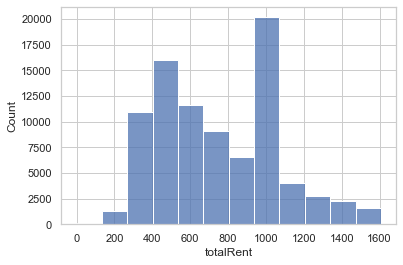

In [43]:
#Let's check the graph using matplot 
sns.histplot(tidy_housing_cleaned , x="totalRent", bins=12)

We can see it here more clearly that we have to peaks one at 500€ and one at 1000€

<AxesSubplot:xlabel='totalRent', ylabel='Count'>

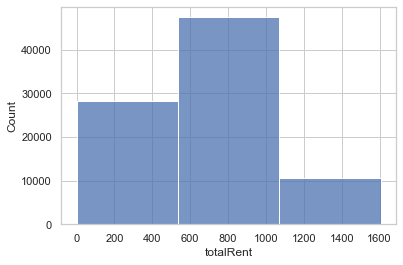

In [44]:
#Let's check the graph using matplot with 3 bins 
sns.histplot(tidy_housing_cleaned , x="totalRent", bins=3)

We could also divide it in 3 bins and divide them in this way, being the most frequent one would be between 600€ and 1000€ :
* From 0-600 €
* From 600-1000 €
* and from 1000-1600 € <br> </br>


In [45]:
#Let's check now the housing without  the missing values removed to see how it behaves: 

(154, 29)


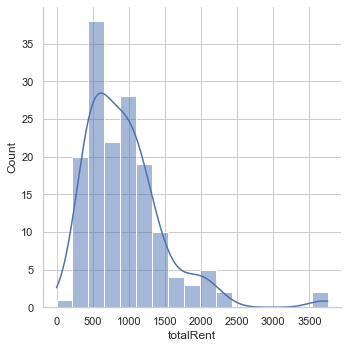

In [46]:
#sns.histplot(housing_ohne_nan.totalRent)
sns.displot(data=tidy_housing_nan, x="totalRent", kde=True)
print(housing_ohne_nan.shape)

We see now a right skew unimodal distribution, with a peak around 500€, let's check if the mean and the median for this one are different:

In [47]:
#For the ohne nan dataset, our mean and median are identical 
mean_tidy_nan = housing_ohne_nan['totalRent'].mean()
median_tidy_nan = housing_ohne_nan['totalRent'].median()
print("the median for this dataset is " +str(median_tidy_nan), ", the mean for this data set is "+str(mean_tidy_nan))

the median for this dataset is 850.5 , the mean for this data set is 940.2456493506493


In this case the median is less than the mean of the data set by 90€, where the mean rent price lies around 940€. 

In [48]:
#Variance, Standard Deviation and mean for clean tidy dataset
rent_variance = np.var(tidy_housing_cleaned.totalRent)
rent_std = np.std(tidy_housing_cleaned.totalRent)
print("The variance for the total rent is "+ str(rent_variance)+ ",","The standard deviation is " + str(rent_std))


The variance for the total rent is 93114.85601053883, The standard deviation is 305.14726938076774


In [49]:
#let's check now for our  dataset with the Nans removed. A larger variance means the data is more spread out and values tend to be far away rom the mean. A variance of 0 means all values in the dataset are the same.
rent_variance_ohne_nan = np.var(housing_ohne_nan.totalRent)
rent_std_ohne_nan = np.std(housing_ohne_nan.totalRent)
print(rent_variance_ohne_nan, rent_std_ohne_nan,housing_ohne_nan.totalRent.mean())

306565.08025314985 553.6831948444434 940.2456493506493


(array([13610., 23588., 13645., 24477.,  5908.,  3926.]),
 array([ 200.        ,  416.66666667,  633.33333333,  850.        ,
        1066.66666667, 1283.33333333, 1500.        ]),
 <BarContainer object of 6 artists>)

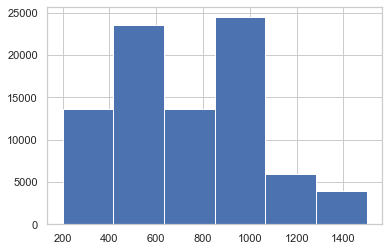

In [50]:
#let's plot an Histogram using Matplotlib Function , it appears to have two distinct peak like a Bimodal Dataset b 
data_array = np.array(tidy_housing_cleaned.totalRent)
plt.hist(data_array, range = (200,1500), bins = 6)

In [51]:
#Let's compare the mean and the median for the three  datasets 
print(tidy_housing_cleaned.totalRent.mean(), mean_tidy_nan, housing.totalRent.mean())

740.007095171934 940.2456493506493 901.331521549675


We have a 200€ diference between our cleaned housing dataset (740€ vs 940€) , and the one with the Nan values removed, also for comparison we calculated the mean of the raw data set where we got 901€

In [52]:
#sns.displot(data=housing_subset, x="totalRent", kde=True)
#print(housing_ohne_nan.shape)

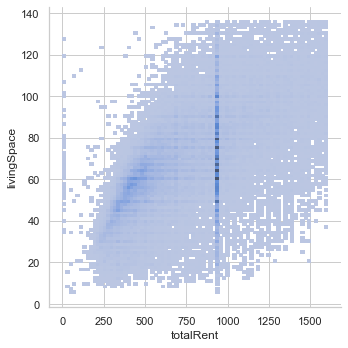

In [53]:
#Let's plot now the total rent prices againts the living space for our cleaned housing dataset 
sns.displot(data=tidy_housing_cleaned , x="totalRent", y="livingSpace")

we can see some relation between the size of the property and the price paid for it, the bigger the property the more you would have to pay for it

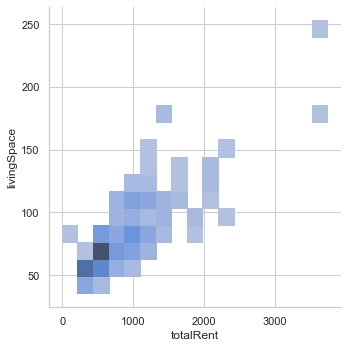

In [54]:
#Let's do it now four our without nan dataset: 
sns.displot(data=tidy_housing_nan , x="totalRent", y="livingSpace")

We can see the same relation here, but also some small outliers clusters for rents over 3000 euros 

Germany has 16 federal states or Bundesländer, could it be that the rent prices within those states differ? we are plotting the total rent prices for each of the 16 Bundesländer and check if there are any differences

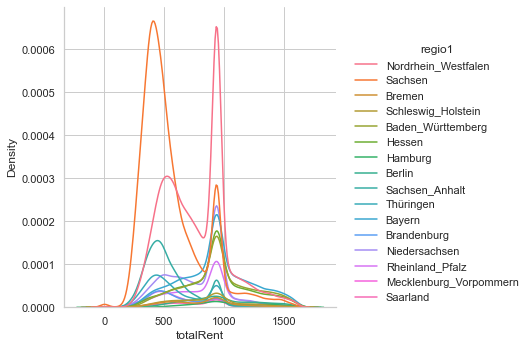

In [55]:
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="regio1", kind="kde")

It is noticeable how Bremen has this uni modal distribution right skewed and it's peak is more to the left than the other Bundesländer, a few more have this behaviour, however most of the Bundesländer have a similar tendency with it's peak around 1000€

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


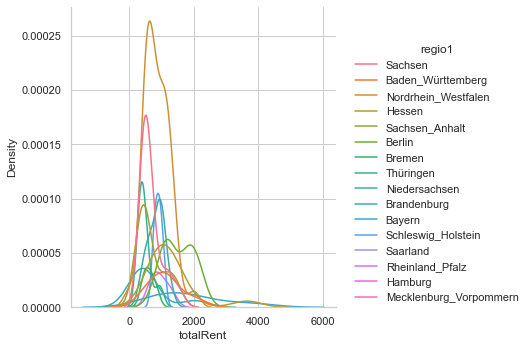

In [56]:
#Let's compare if the dataset without Nan and the cleaned one, throw similar results: 

sns.displot(data=housing_ohne_nan, x="totalRent", hue="regio1", kind="kde")


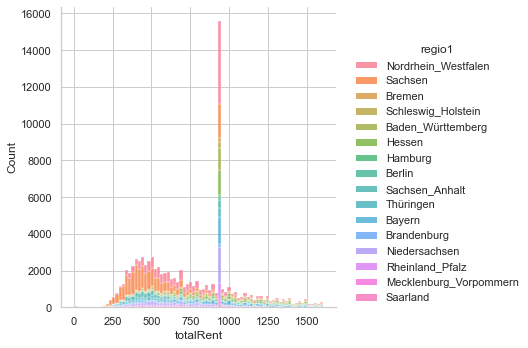

In [57]:
sns.displot(data=tidy_housing_cleaned, x="totalRent", hue="regio1", multiple="stack")


we can see here how the majority of properties under 600€ are to be found in Sachsen, for the 900-1000€ segment the biggest count comes from Nordrhein Westphalen, Niedersachsen and Sachsen. 

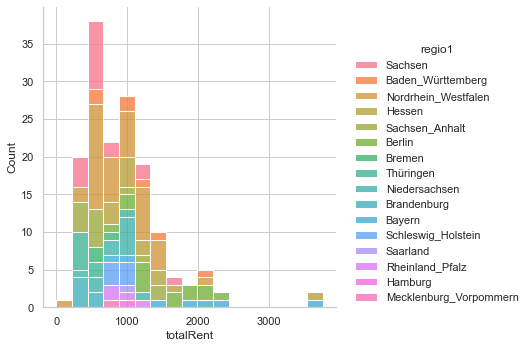

In [58]:
#Let's check it again without the missing values 
sns.displot(data=tidy_housing_nan, x="totalRent", hue="regio1", multiple="stack")

Stacking the regions count we can see how Nordrhein Westfalen  has a big count of properties  for the total Rent below 1000€, also Sachsen has a good stack count. For the 1000€ Nordrhein Westfalen is still the biggest stack. The outliers in this graph would be Bayern and Hessen, this would say that the most expensive properties are in those Bundesländer. It is also noteable how low the properties offer in Baden Württemberg is.

<AxesSubplot:xlabel='totalRent', ylabel='Density'>

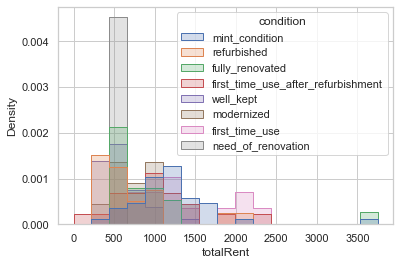

In [59]:
#Let's check the plot using the condition of the properties 
sns.histplot(
    housing_ohne_nan, x="totalRent", hue="condition", element="step",
    stat="density", common_norm=False,
)

We see that for the 500€ properties we have some refurbished ones and fully renovated, how ever many of them needs renovation, in contrast to this for the 1000€ we have some first time use after refurbishment, some refurbished and some modernized ones. 

<AxesSubplot:xlabel='totalRent', ylabel='Density'>

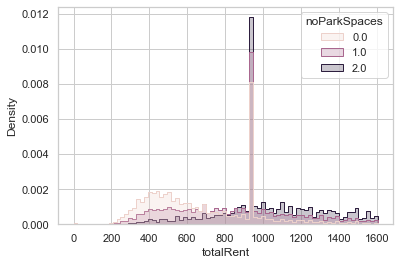

In [60]:
#Let's see now how the parking spaces behaves: 
sns.histplot(
    tidy_housing_cleaned , x="totalRent", hue="noParkSpaces", element="step",
    stat="density", common_norm=False,
)

For the range of 200€ until 600€ the most common is not having any parkings space. However for the 900€ segment a lot of properties still don't have parking space, after this price it is more common to have a parking space in your property.

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


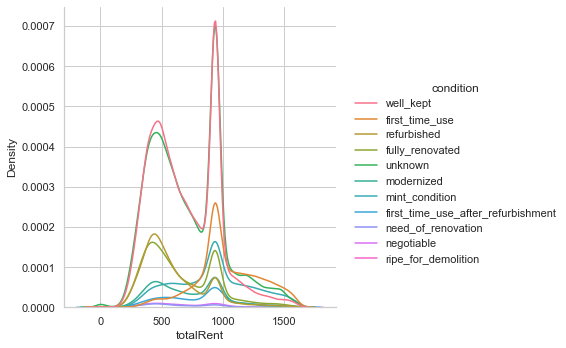

In [61]:
#Let's plot it using condition as hue. 
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="condition", kind="kde")

we can see here how most of the properties are well kept and first time use, we have a lot of unknown state, so let's plot the dataset without the missing values: 

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


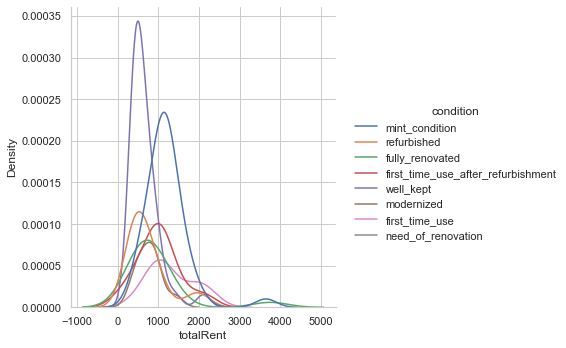

In [62]:
sns.displot(data=housing_ohne_nan , x="totalRent", hue="condition", kind="kde")

In this case, the well kept and mint_condition are the ones with highest density

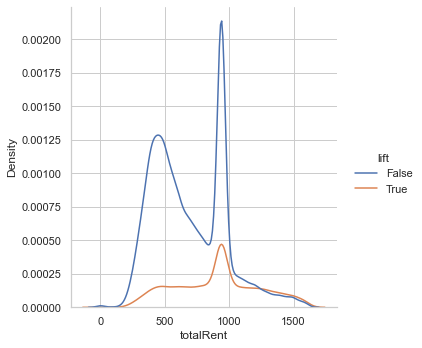

In [63]:
#Does having a lift influence heavily the price per month?
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="lift", kind="kde")

Visually there would be no hint to state that the with lift and without lift distribution are significantly different

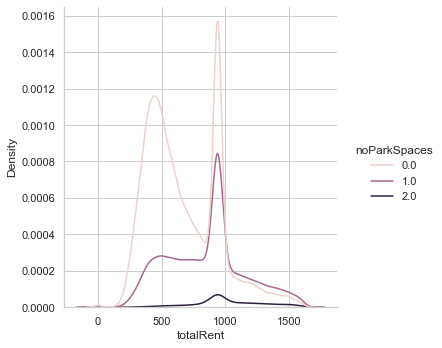

In [64]:
#How about the parking spaces one? 
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="noParkSpaces", kind="kde")

The distribution for 0 Parking Spaces seems to have a more noticeable two peaks that the with one and the 2 parking spaces

In [65]:
# Let's summarize the unique values columns.
columns = ['regio1','typeOfFlat','heatingType','condition','regio2','regio3']

for column in columns:
    print('-'*50)
    print('Column name: {c}'.format(c = column.upper()))
    print(housing[column].value_counts())

--------------------------------------------------
Column name: REGIO1
Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64
--------------------------------------------------
Column name: TYPEOFFLAT
apartment              131522
roof_storey             34787
ground_floor            31538
other                    9519
maisonette               9319
raised_ground_floor      5628
penthouse                3568
terraced_flat            3385
half_basement            2013
loft                      957
Name: typeOfFla

<AxesSubplot:>

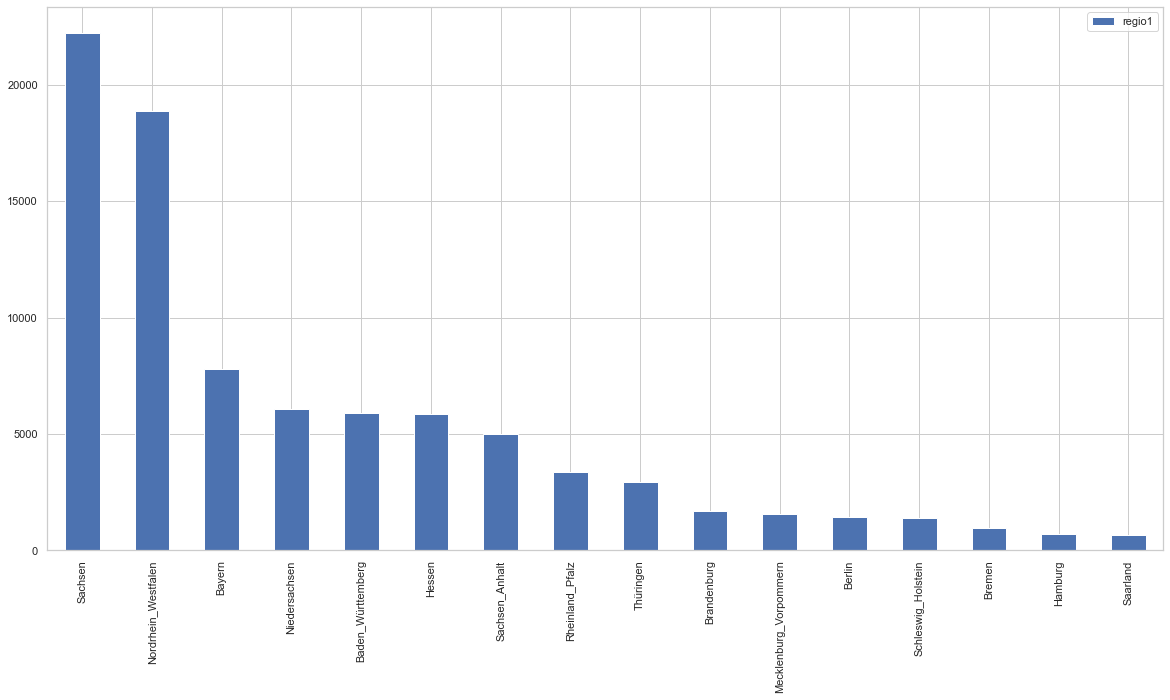

In [66]:
#Let's check which Bundesland has the biggest number of properties, which in this case for our tidy dataset is Sachsen
# followed by Nordrheinwestphalen, and then Bayern with almost a third of NW the listings. 
pd.DataFrame(tidy_housing_cleaned['regio1'].value_counts()).plot(kind='bar', figsize=(20,10))

In [67]:
property_type = housing.groupby('typeOfFlat').date.count().reset_index()
property_type_asc = property_type.sort_values(by=['date'], ascending = False).reset_index(drop=True)
property_agr= property_type_asc.sort_values(by=['date'], ascending = False).reset_index(drop= True)
property_agr= property_agr[:4]
other_prop= property_type_asc[3:10].reset_index()
other_prop.drop(['index'],axis=1,inplace=True)

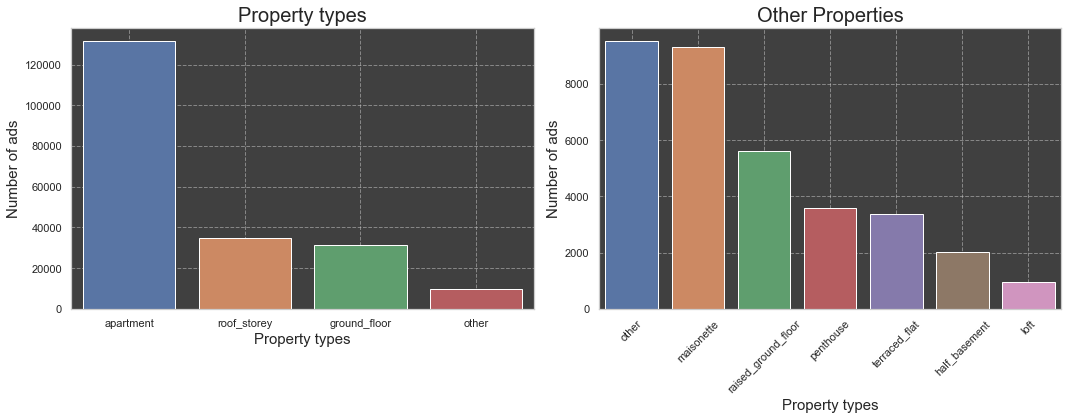

In [68]:
fig = plt.figure(figsize = (15,6))
ax1= fig.add_subplot(121)
ax1= sns.barplot(data = property_agr,x='typeOfFlat',y='date')
ax1.set_title('Property types', fontsize= 20)
ax1.set_xlabel('Property types', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)

ax2= fig.add_subplot(122)
ax2=sns.barplot(data =other_prop,x='typeOfFlat',y='date')
plt.xticks(rotation=45)
ax2.set_title('Other Properties', fontsize = 20)
ax2.set_xlabel('Property types', fontsize =15)
ax2.set_ylabel('Number of ads', fontsize = 15)
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show()

<AxesSubplot:>

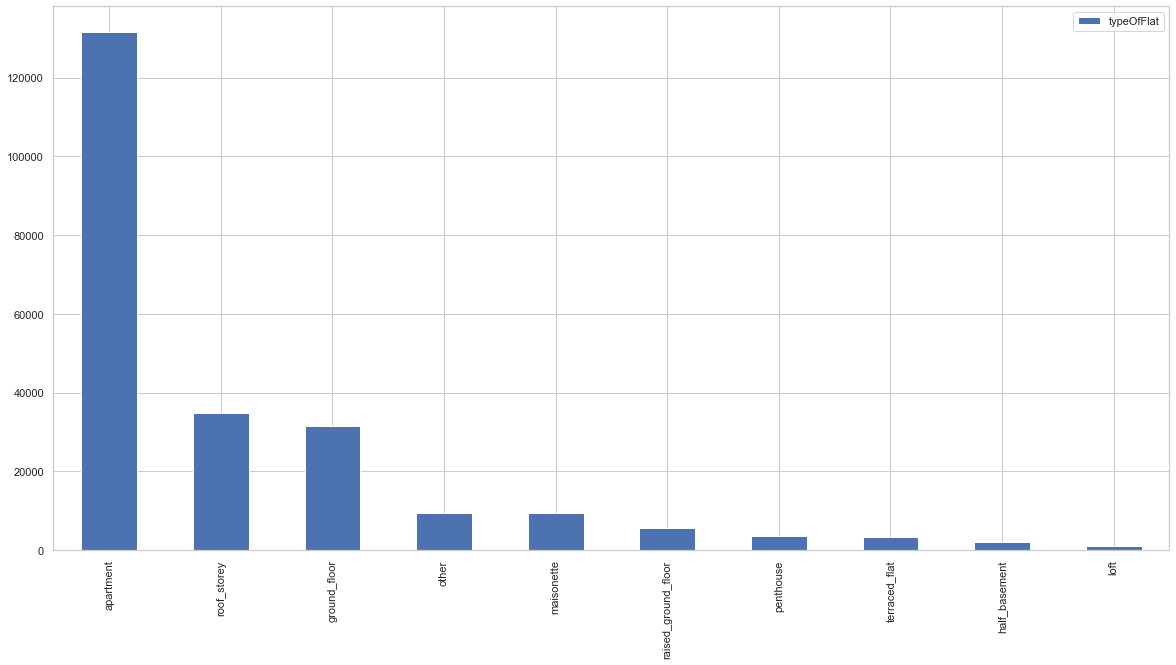

In [69]:
#Let's plot it again in one graph checking  the distribution of the typeOfFlat column
pd.DataFrame(housing_subset['typeOfFlat'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

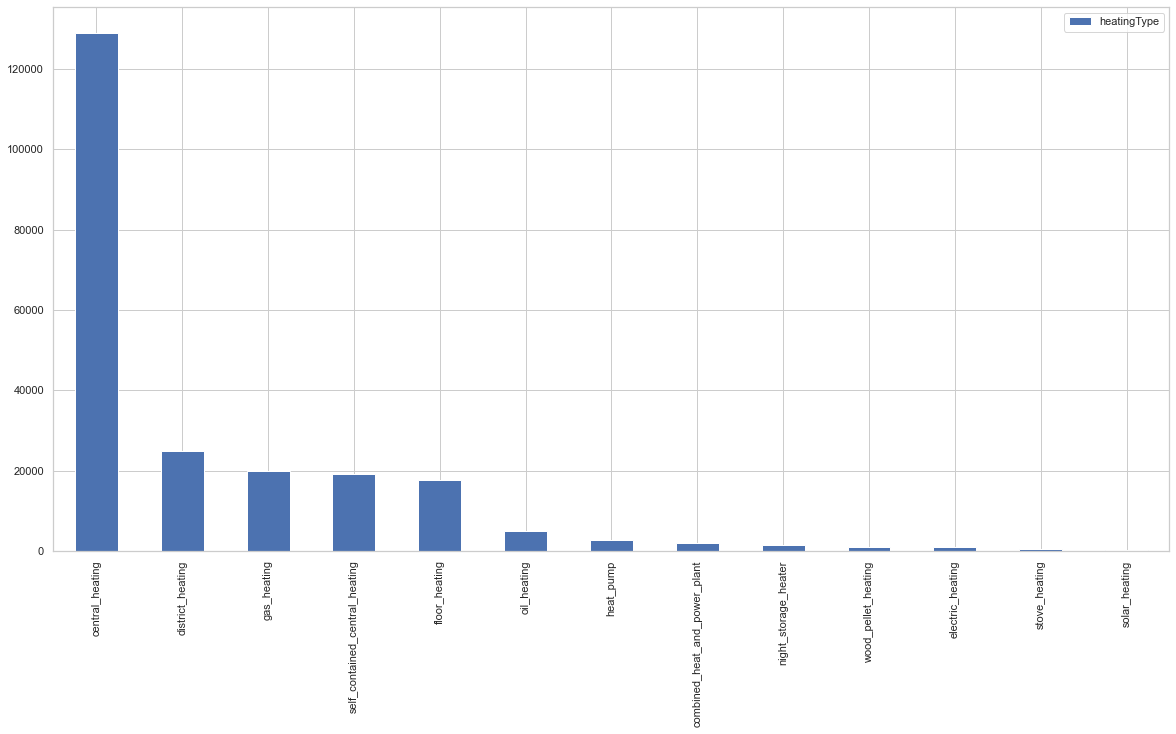

In [70]:
#Let's check the distribution of the heatingType column
pd.DataFrame(housing_subset['heatingType'].value_counts()).plot(kind='bar', figsize=(20,10))

We can see here  how most of the properties in Germany use central heating, followed by district and gas heating. There are a few that use elecric, and stove heating and the less common type of heating is the solar one (2020 data)

<AxesSubplot:>

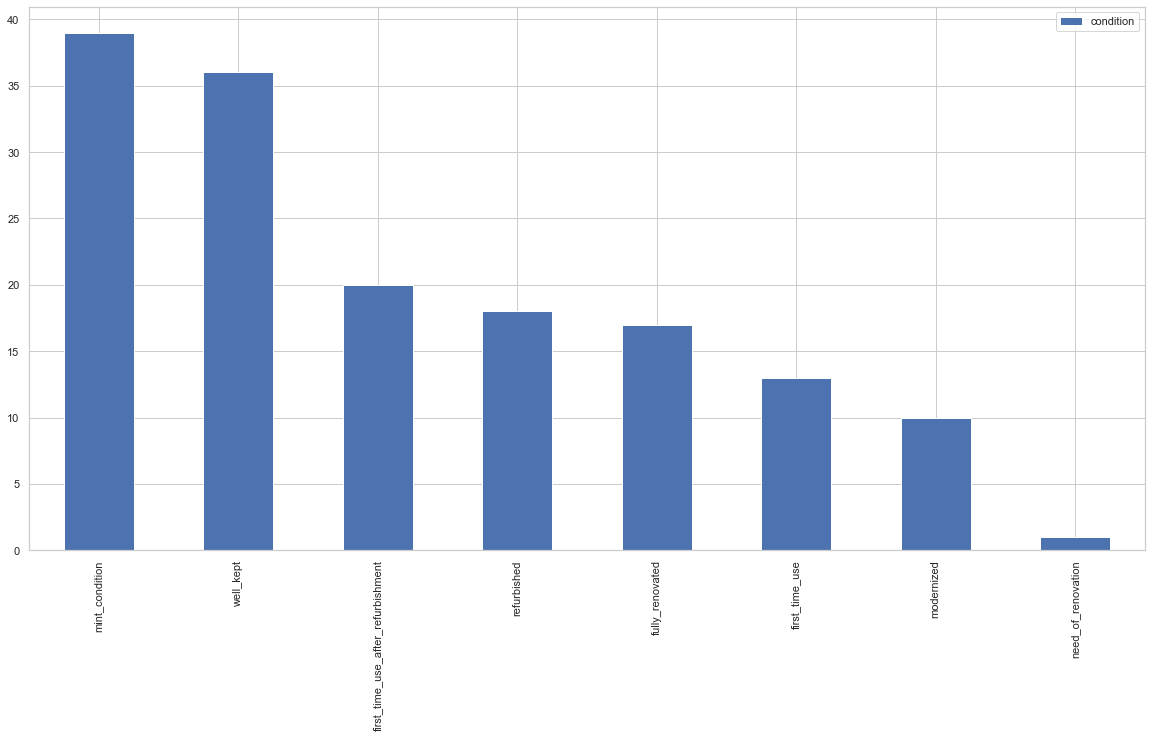

In [71]:
#Let's check the distribution of the condition column
pd.DataFrame(housing_ohne_nan['condition'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

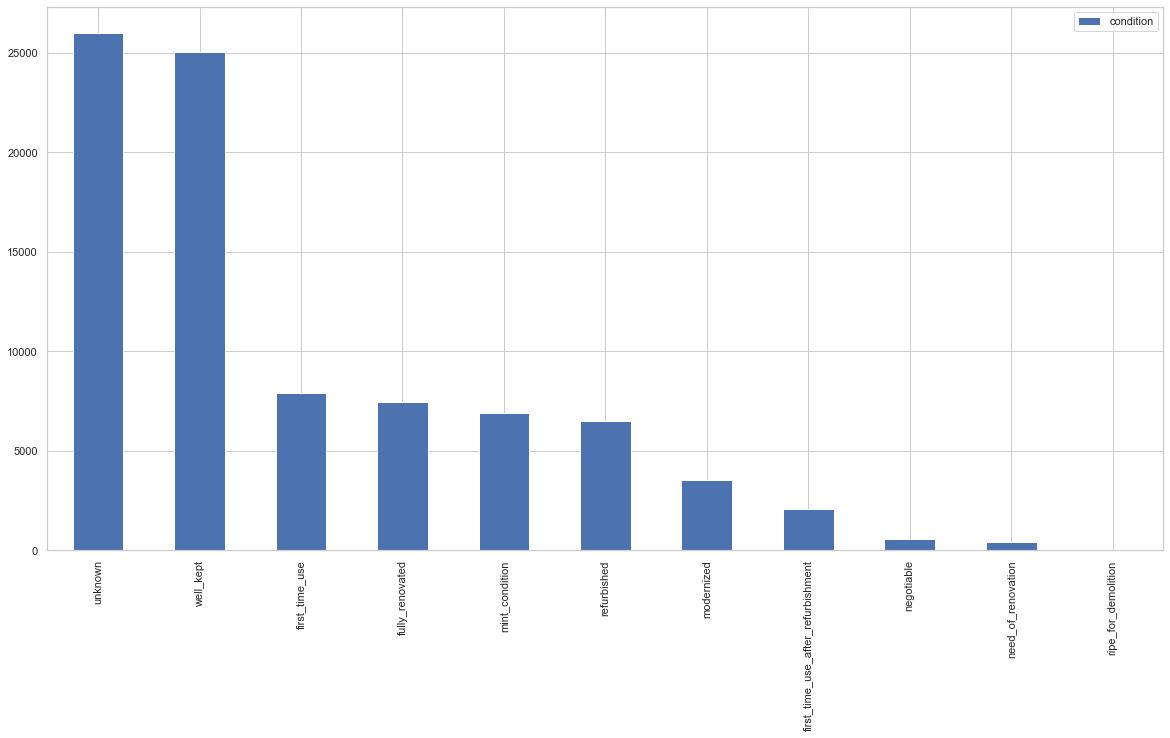

In [72]:
pd.DataFrame(tidy_housing_cleaned['condition'].value_counts()).plot(kind='bar', figsize=(20,10))

We can see a little bit better here with colums the above property condition graphic, most of the properties in the dataset are well kept, followed by refurbish and fully renovated. There are a tiny proportion in need of renovation and ripe for demolition

<AxesSubplot:>

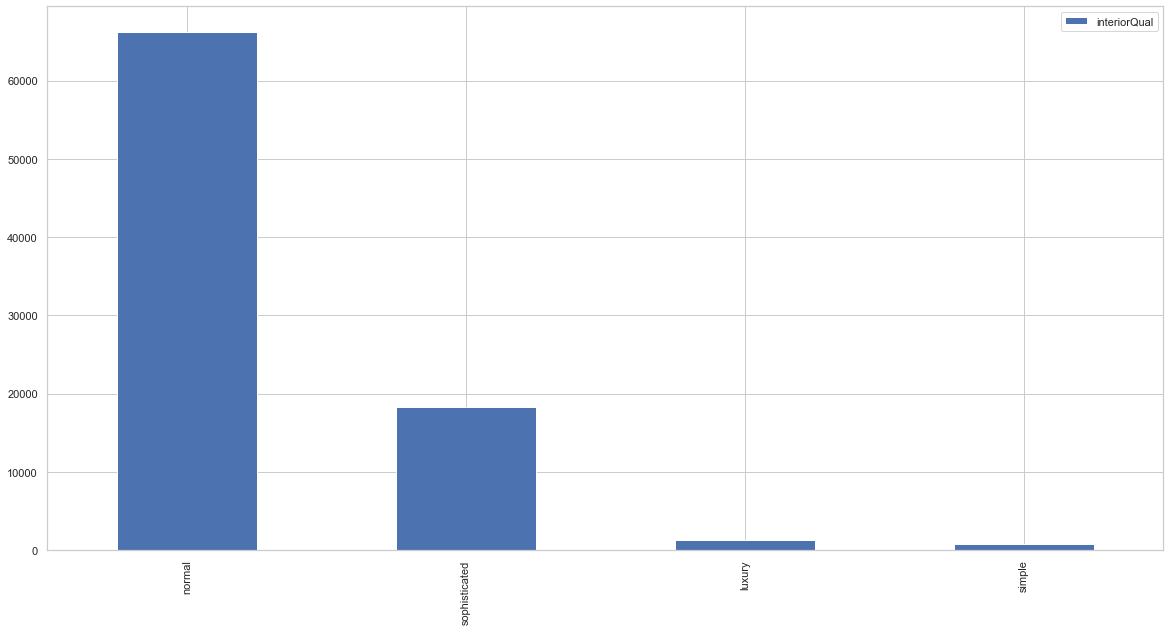

In [73]:
#Let's check the interior quality column
pd.DataFrame(tidy_housing_cleaned['interiorQual'].value_counts()).plot(kind='bar', figsize=(20,10))

It comes to attention, that the sophisticaded properties are almost as frequent as normal ones for this data set. As expected the luxury ones have a lower proportion, but the simple ones are the least common ones 

<AxesSubplot:>

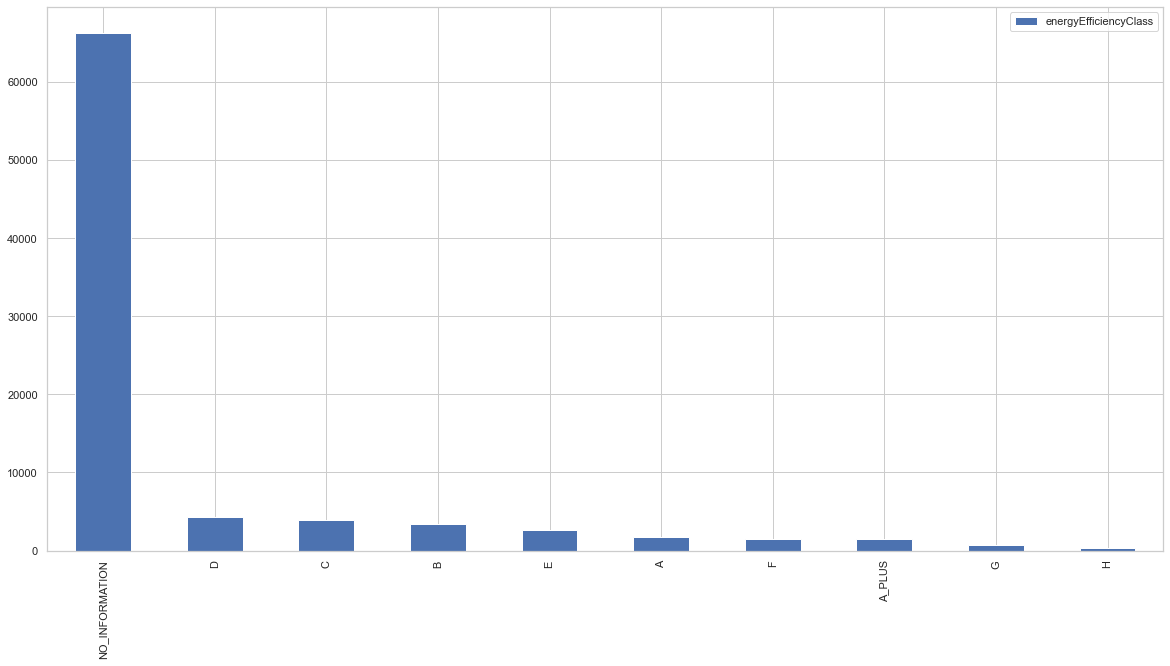

In [74]:
#Let's take a look at the energy efficiency column 
pd.DataFrame(tidy_housing_cleaned['energyEfficiencyClass'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

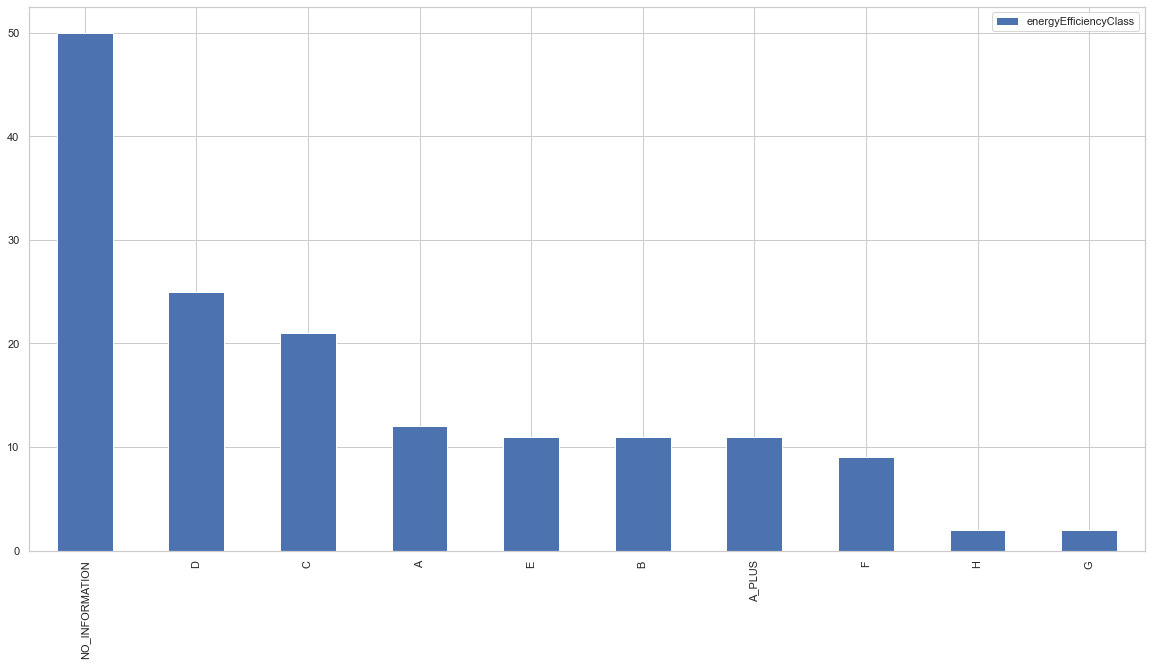

In [75]:
pd.DataFrame(housing_ohne_nan['energyEfficiencyClass'].value_counts()).plot(kind='bar', figsize=(20,10))

The most common efficiency class would be the D, which according to the "Effizienzklassen von A+ bis H" efficiency classes, it would take less than 130 kWh/m^2 of area which would make +- 9 euro per square meter,  and for C +- Eur. (these are 2021 approximates) 

<h2> Hypothesis Testing </h2>

<h3>Testing for an association</h3>

In [76]:
# Is the rent mean significally higher in one Bundesland? 

* <p> <b>Null Hypothesis: </b> There is no significant difference between the mean of two random Bundesländer
<br>
* <b> Alternative Hypothesis </b>: There is a mean rent difference between two selected Bundesländer
</p>

In [83]:
rent_NW = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Nordrhein_Westfalen']
rent_RP = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Rheinland_Pfalz']
rent_SN = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Sachsen']
rent_HB = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Bremen']
rent_SH = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Schleswig_Holstein']
rent_BW = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Baden_Württemberg']
rent_HE=  housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Hessen']
rent_TH = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Thüringen']
rent_NI = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Niedersachsen']
rent_BY = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Bayern']
rent_HH = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Hamburg']
rent_ST = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Sachsen_Anhalt']
rent_MV = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Mecklenburg_Vorpommern']
rent_BE = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Berlin']
rent_BB = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Brandenburg']
rent_SL = housing_ohne_nan.totalRent[housing_ohne_nan.regio1 == 'Saarland']

<h4> Two Sample T-Test </h4> 

we will use  a two-sample t-test to investigate an association between a quantitative variable (price of rent in €) and a binary categorical variable (one property type and another).



In [85]:
housing.typeOfFlat.unique()

array(['ground_floor', 'apartment', 'other', nan, 'roof_storey',
       'raised_ground_floor', 'terraced_flat', 'half_basement',
       'maisonette', 'penthouse', 'loft'], dtype=object)

In [86]:
apartment = housing_ohne_nan.totalRent[housing_ohne_nan.typeOfFlat =='apartment']
ground = housing_ohne_nan.totalRent[housing_ohne_nan.typeOfFlat =='ground_floor']

In [87]:
# Two-Sample T-Test 
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(apartment, ground)
print(pval)

0.5318109864205312


there would not be a significant difference between the average of the apartments and the ground floor properties

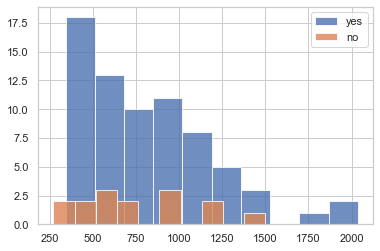

In [88]:
plt.hist(apartment,alpha=.8,label='yes')
plt.hist (ground, alpha=.8,label = 'no')
plt.legend()
plt.show()

<h4> ANOVA Test </h4>

ANOVA tests the null hypothesis that all groups have the same population mean

In [90]:
#let's run an ANOVA test

from scipy.stats import f_oneway
fstat, pval = f_oneway(rent_NW, rent_RP, rent_SN, rent_HB, rent_SH,rent_BW, rent_TH, rent_NI,rent_BY,rent_HH, rent_ST,rent_MV,rent_BE, rent_BB,rent_SL,rent_HE )
print(pval)

4.928791203656613e-08


<p> the p-value is below our significance threshold, we can conclude that at least one pair of our groups we can conclude that at least one pair of our groups has a significantly rent price difference </p>

<h4> Tukey's Range Test </h4>

Tukey’s range test is similar to running eparate 2-sample t-tests, except that it runs all of these tests simultaneously in order to preserve the type I error rate.

In [91]:
#To see which pairs, we will run a TUKEY test 

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(housing_ohne_nan.totalRent, housing_ohne_nan.regio1, 0.05)
print(tukey_results)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                 group2          meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------------------------------
     Baden_Württemberg                 Bayern    713.119 0.3192  -196.3664 1622.6045  False
     Baden_Württemberg                 Berlin   396.1664    0.9  -360.5712 1152.9041  False
     Baden_Württemberg            Brandenburg  -485.5143 0.8332 -1359.3196  388.2911  False
     Baden_Württemberg                 Bremen   -519.381    0.9 -1647.4588  608.6969  False
     Baden_Württemberg                Hamburg   -52.7143    0.9  -1800.325 1694.8964  False
     Baden_Württemberg                 Hessen   164.4126    0.9  -601.9653  930.7906  False
     Baden_Württemberg Mecklenburg_Vorpommern  -397.7143    0.9  -2145.325 1349.8964  False
     Baden_Württemberg          Niedersachsen  -301.3961    0.9 -1091.7828  488.

For every comparison where reject is True, we "reject the null hypothesis" and conclude there is a significant difference between those two groups, we are using a 95% confidence interval

Among these for example we don't reject the hypothesis for Bayern and Berlin, but we reject it for Bayern and Brandemburg which is the region surrounding Berlin, and it show us how the Berlin prices are higher than its region. We also reject it for Bayern and Nordrheinwestphalen 


<b> Assumptions of T-Tests, ANOVA, and Tukey </b>


* Observations are independently randomly sampled from the population
* Standard deviations of the groups are equal
* Data is normally distributed
* Groups created by the categorical variable are independent 

<h4> Chi-Test </h4>

<b> Assumptions: </b>

* Observations are independently randomly sampled from the population

* Categories of both variables are mutually exclusive

* Groups are independent 

To understand whether the outcomes of two categorical variables are associated, we can use a Chi-Square test.

In [93]:
table = pd.crosstab(housing_ohne_nan.regio1, housing_ohne_nan.petsAllowed)
#run the test:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(table)
print (chi2,pval,dof)

78.84711432552861 2.889897299470236e-06 30


There would be an association between pets allowed and which Bundesland the property is located in

<h4> two categorical variables associations </h4> 

In [94]:
#which Bundesland would be the most pet friendly one? 
bundesland_pets_freq = pd.crosstab(tidy_housing_cleaned.regio1, tidy_housing_cleaned.petsAllowed)
print(bundesland_pets_freq)

petsAllowed             negotiable     no  yes
regio1                                        
Baden_Württemberg              876   4874  133
Bayern                        1281   6326  186
Berlin                         461    917   46
Brandenburg                    620    933  119
Bremen                         278    664   16
Hamburg                        161    534   15
Hessen                        1359   4367  125
Mecklenburg_Vorpommern         526    983   63
Niedersachsen                 1501   4459  107
Nordrhein_Westfalen           5480  12887  483
Rheinland_Pfalz                841   2472   67
Saarland                       114    510   20
Sachsen                       9404  11830  993
Sachsen_Anhalt                2195   2577  237
Schleswig_Holstein             429    936   38
Thüringen                      897   1913  117


In [98]:
#To see how different these two tables are let's calculate the Chi-Square value 

In [99]:
# The more associated two variables are, the larger the Chi-Square statistic will be
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(bundesland_pets_freq)
print(chi2)

4397.130568484488


<p> Sachsen would be the most friendly Bundesland followed by Sachsen Anhalt. Also Thüringen and Brandeburg goes in the pets friendly list. It seems also Nordrhein Westfalen ist pretty open to negotiatiate this subject <p> 

In [100]:
#Contingency Tables: Proportions
bundesland_pets_prop = (bundesland_pets_freq/len(tidy_housing_cleaned))
print(bundesland_pets_prop)

petsAllowed             negotiable        no       yes
regio1                                                
Baden_Württemberg         0.010142  0.056432  0.001540
Bayern                    0.014832  0.073243  0.002154
Berlin                    0.005338  0.010617  0.000533
Brandenburg               0.007178  0.010802  0.001378
Bremen                    0.003219  0.007688  0.000185
Hamburg                   0.001864  0.006183  0.000174
Hessen                    0.015735  0.050562  0.001447
Mecklenburg_Vorpommern    0.006090  0.011381  0.000729
Niedersachsen             0.017379  0.051627  0.001239
Nordrhein_Westfalen       0.063448  0.149207  0.005592
Rheinland_Pfalz           0.009737  0.028621  0.000776
Saarland                  0.001320  0.005905  0.000232
Sachsen                   0.108880  0.136969  0.011497
Sachsen_Anhalt            0.025414  0.029837  0.002744
Schleswig_Holstein        0.004967  0.010837  0.000440
Thüringen                 0.010386  0.022149  0.001355


In [101]:
#Marginal Proportions 

pet_marginals = bundesland_pets_prop.sum(axis=0)
print(pet_marginals)

petsAllowed
negotiable    0.305928
no            0.662059
yes           0.032013
dtype: float64


The most usual answer will be a no with almost 2/3 of the times and the negotiable and yes properties would sum up 1/3 of the properties

In [102]:
# contingency table of expected proportions if there were no association
# This table tells us that if there were no association between the Bundesland and having a pet is negotiable, possible or not possible
# we would expect for example for 876 properties for Baden_Württemberg to allow to negotiate if there could be a pet or not   
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(bundesland_pets_freq)
print(np.round(expected))


[[ 1800.  3895.   188.]
 [ 2384.  5159.   249.]
 [  436.   943.    46.]
 [  512.  1107.    54.]
 [  293.   634.    31.]
 [  217.   470.    23.]
 [ 1790.  3874.   187.]
 [  481.  1041.    50.]
 [ 1856.  4017.   194.]
 [ 5767. 12480.   603.]
 [ 1034.  2238.   108.]
 [  197.   426.    21.]
 [ 6800. 14716.   712.]
 [ 1532.  3316.   160.]
 [  429.   929.    45.]
 [  895.  1938.    94.]]


<p> For Baden Wüttenberg there is a big difference as there expected and observed values differ we could have some additional certainty that the variables are associated </p>

In [103]:
# contingency tables --firing types
firing_condition_freq = pd.crosstab(housing_ohne_nan.firingTypes,housing_ohne_nan.condition)
print(firing_condition_freq)

condition                     first_time_use  \
firingTypes                                    
district_heating                           2   
electricity                                1   
environmental_thermal_energy               0   
gas                                        6   
geothermal                                 1   
liquid_gas                                 0   
natural_gas_heavy                          0   
natural_gas_light                          1   
oil                                        1   
pellet_heating                             1   
solar_heating                              0   
steam_district_heating                     0   

condition                     first_time_use_after_refurbishment  \
firingTypes                                                        
district_heating                                               5   
electricity                                                    2   
environmental_thermal_energy                           

<p> Now that we have the expected contingency table If there is no association, we can compare it to our observed contingency table </p>

we can see here how for the first time use properties gas is the most common firing type, for the ones after refurbishment central heating becomes more a common option. 

In [104]:
firing_condition_prop = firing_condition_freq/len(housing_ohne_nan)
print(firing_condition_prop)

condition                     first_time_use  \
firingTypes                                    
district_heating                    0.012987   
electricity                         0.006494   
environmental_thermal_energy        0.000000   
gas                                 0.038961   
geothermal                          0.006494   
liquid_gas                          0.000000   
natural_gas_heavy                   0.000000   
natural_gas_light                   0.006494   
oil                                 0.006494   
pellet_heating                      0.006494   
solar_heating                       0.000000   
steam_district_heating              0.000000   

condition                     first_time_use_after_refurbishment  \
firingTypes                                                        
district_heating                                        0.032468   
electricity                                             0.012987   
environmental_thermal_energy                           

In [105]:
firing_marginals = firing_condition_prop.sum(axis = 0)
print(firing_marginals)

condition
first_time_use                        0.084416
first_time_use_after_refurbishment    0.129870
fully_renovated                       0.110390
mint_condition                        0.253247
modernized                            0.064935
need_of_renovation                    0.006494
refurbished                           0.116883
well_kept                             0.233766
dtype: float64


In [106]:
#the mean of the variable is equal to the proportion of 1's or True's. Meanwhile, the sm of the variable is equal to the frequency of 1's or True's
bi_newly_const = np.array(tidy_housing_cleaned.newlyConst)
print(np.mean(bi_newly_const),np.sum(bi_newly_const))



0.09194164640500174 7941


In [107]:
bi_newly_balcony = np.array(housing_ohne_nan.balcony)
print(np.mean(bi_newly_const),np.sum(bi_newly_balcony))

0.09194164640500174 111


In [108]:
bi_lift = np.array(tidy_housing_cleaned.lift)
print(np.mean(bi_lift),np.sum(bi_lift))

0.21591987958781986 18649


In [109]:
#19% 
bi_garden = np.array(tidy_housing_cleaned.garden)
print(np.mean(bi_garden  ),np.sum(bi_garden))

0.19682760217668172 17000


In [110]:
# Get the housing count by energy source 
firing_counts = tidy_housing_cleaned['firingTypes'].value_counts()
print(firing_counts)


gas                                                         38147
unknown                                                     22428
district_heating                                             9566
oil                                                          5060
natural_gas_light                                            3122
                                                            ...  
solar_heating:environmental_thermal_energy                      1
geothermal:solar_heating:pellet_heating:district_heating        1
gas:district_heating:local_heating                              1
electricity:coal                                                1
electricity:natural_gas_light                                   1
Name: firingTypes, Length: 83, dtype: int64


In [111]:
# Get the most common energy source 
most_firing = firing_counts.index[0]
most_firing

'gas'

In [112]:
#Ordinal Categorical Variables
# We will work it with the raw dataset where this column hasn't been dropped 
print(list(housing['baseRentRange'].unique()))
#make a list to indicate the desired order 
correct_order = [1,2,3,4,5,6,7,8,9]
correct_order_lv = [1,2,3,4,5,6,7]
housing['baseRentRange']= pd.Categorical(housing['baseRentRange'],correct_order, ordered=True)
housing['livingSpaceRange'] = pd.Categorical(housing['livingSpaceRange'],correct_order_lv, ordered=True)

[4, 5, 6, 2, 3, 1, 7, 8, 9]


In [113]:
print(housing['baseRentRange'])

0         4
1         5
2         6
3         2
4         5
         ..
268845    6
268846    6
268847    5
268848    6
268849    6
Name: baseRentRange, Length: 268850, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]


In [114]:
print(housing['livingSpaceRange'].unique())

[4, 2, 3, 1, 6, 7, 5]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]


In [115]:
median_index_base_rent = np.median(housing['baseRentRange'].cat.codes)
print(median_index_base_rent)

2.0


In [116]:
median_index_living_space = np.median(housing['livingSpaceRange'].cat.codes)
print(median_index_living_space)

2.0


In [117]:
median_category = correct_order[int(median_index_base_rent)]
print(median_category)

3


In [118]:
median_category_lv = correct_order_lv[int(median_index_living_space)]
print(median_category_lv)

3


In [119]:
#Spread

tenth_perc_ind_rent = np.percentile(housing['baseRentRange'].cat.codes,10)
tenth_perc_cat_rent = correct_order[int(tenth_perc_ind_rent)]
nintieth_perc_ind_rent = np.percentile(housing['baseRentRange'].cat.codes,90)
nintieth_perc_cat_rent = correct_order[int(nintieth_perc_ind_rent)]

print(tenth_perc_cat_rent,nintieth_perc_cat_rent)

#At least 80% of the Base Rent for properties are within the pricing range 1 to 7 

1 7


In [120]:
#Table of Proportions for categorical variable 
tidy_housing_cleaned['firingTypes'].value_counts()/len(tidy_housing_cleaned['firingTypes'])

gas                                                         0.441670
unknown                                                     0.259673
district_heating                                            0.110756
oil                                                         0.058585
natural_gas_light                                           0.036147
                                                              ...   
solar_heating:environmental_thermal_energy                  0.000012
geothermal:solar_heating:pellet_heating:district_heating    0.000012
gas:district_heating:local_heating                          0.000012
electricity:coal                                            0.000012
electricity:natural_gas_light                               0.000012
Name: firingTypes, Length: 83, dtype: float64

In [121]:
housing['telekomTvOffer'].value_counts(normalize=True).head()

ONE_YEAR_FREE    0.963599
NONE             0.020984
ON_DEMAND        0.015417
Name: telekomTvOffer, dtype: float64

In [122]:
tidy_housing_cleaned['balcony'].value_counts(normalize=True).head()

True     0.576543
False    0.423457
Name: balcony, dtype: float64

In [123]:
housing_ohne_nan['balcony'].value_counts(normalize=True).head()

True     0.720779
False    0.279221
Name: balcony, dtype: float64

In [124]:
housing['balcony'].value_counts(dropna= False, normalize=True).head()

True     0.616455
False    0.383545
Name: balcony, dtype: float64

In [125]:
housing['firingTypes'].value_counts(dropna= True, normalize=True).head()

gas                  0.523390
district_heating     0.233092
oil                  0.085598
natural_gas_light    0.047573
electricity          0.022833
Name: firingTypes, dtype: float64

In [126]:
housing['firingTypes'].value_counts(dropna= False, normalize=True).head()

gas                  0.412494
NaN                  0.211880
district_heating     0.183705
oil                  0.067461
natural_gas_light    0.037493
Name: firingTypes, dtype: float64

In [127]:
#Binary Categorial Variables 
print(np.mean(tidy_housing_cleaned['cellar']),np.sum(tidy_housing_cleaned['cellar']))


0.6156883177029061 53177


In [128]:
print(tidy_housing_cleaned == 'well_kept')

        regio1  serviceCharge  heatingType  newlyConst  balcony  totalRent  \
0        False          False        False       False    False      False   
2        False          False        False       False    False      False   
4        False          False        False       False    False      False   
5        False          False        False       False    False      False   
6        False          False        False       False    False      False   
...        ...            ...          ...         ...      ...        ...   
268831   False          False        False       False    False      False   
268833   False          False        False       False    False      False   
268837   False          False        False       False    False      False   
268838   False          False        False       False    False      False   
268845   False          False        False       False    False      False   

        yearConstructed  noParkSpaces  firingTypes  hasKitchen 

In [129]:
(tidy_housing_cleaned.condition == 'well_kept').sum()

25019

In [130]:
(tidy_housing_cleaned.condition == 'well_kept').mean()

0.2896723399328471

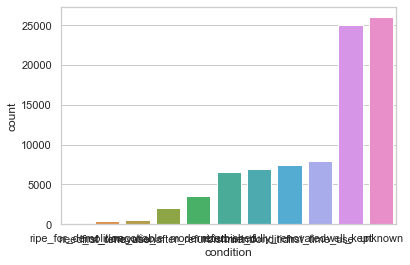

In [131]:
#Bar Chart Nominal Data Ordering

ax= sns.countplot(x=tidy_housing_cleaned["condition"], order=tidy_housing_cleaned["condition"].value_counts(ascending=True).index)

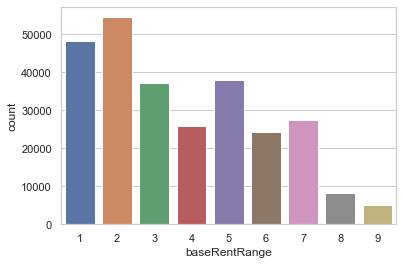

In [132]:
ax = sns.countplot(x=housing["baseRentRange"], data=housing, order=[1,2,3,4,5,6,7,8,9])

<h3> Standarization Test </h3>

In [133]:
from sklearn.preprocessing import MinMaxScaler

# Min Max Normalization
scaler = MinMaxScaler()
standard_scale_test= housing_ohne_nan[['totalRent','yearConstructed','livingSpace']]
standard_scale_test= standard_scale_test.astype({"totalRent":'int', "yearConstructed":'int', "livingSpace":'int'}) 
normalized_data = scaler.fit_transform(standard_scale_test)
x_data= housing[['totalRent','yearConstructed','livingSpace']]

In [134]:
x_Data = x_data.apply(lambda x : (x- x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [135]:
x_Data

,totalRent,yearConstructed,livingSpace
0,0.000053,0.885321,0.000774
1,NaN,0.799083,0.000801
2,0.000083,0.934862,0.000754
3,NaN,0.884404,0.000523
4,0.000057,0.871560,0.000765
...,...,...,...
268845,0.000058,0.932110,0.000810
268846,0.000073,0.901835,0.001035
268847,0.000059,0.885321,0.000855
268848,0.000064,0.934862,0.000630


In [136]:
normalized_data

array([[0.41278296, 0.98550725, 0.34862385],
       [0.27962716, 0.63043478, 0.18348624],
       [0.32836218, 0.98550725, 0.22018349],
       [0.2849534 , 0.34057971, 0.42201835],
       [0.2412783 , 0.98550725, 0.0733945 ],
       [0.12782956, 0.84057971, 0.16513761],
       [0.59014647, 0.76811594, 0.51834862],
       [0.14780293, 0.63043478, 0.19266055],
       [0.07509987, 0.78985507, 0.        ],
       [0.1677763 , 0.67391304, 0.13302752],
       [0.29267643, 0.99275362, 0.21559633],
       [0.15552597, 0.79710145, 0.24311927],
       [0.29640479, 0.20289855, 0.30275229],
       [0.0942743 , 0.03623188, 0.09633028],
       [0.15845539, 0.82608696, 0.20642202],
       [0.12516644, 0.22463768, 0.1146789 ],
       [0.54860186, 0.64492754, 0.40825688],
       [0.18641811, 0.73913043, 0.29816514],
       [0.20905459, 0.55072464, 0.20642202],
       [0.1150466 , 0.86956522, 0.07798165],
       [0.17390146, 0.89855072, 0.19724771],
       [0.10652463, 0.76086957, 0.07798165],
       [0.

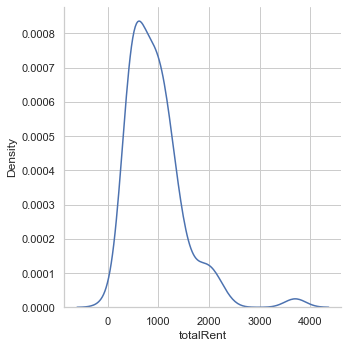

In [137]:
# Standardization 

sns.displot(data=standard_scale_test, x="totalRent", kind="kde")

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(standard_scale_test)

<AxesSubplot:xlabel='yearConstructed', ylabel='totalRent'>

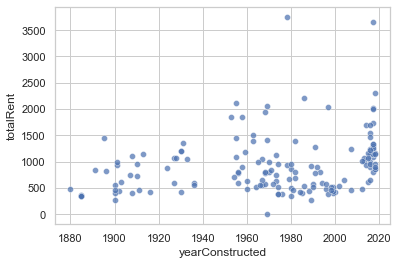

In [139]:
#  STANDARIZE TEST PENDING 

sns.scatterplot(data=standard_scale_test, x="yearConstructed", y="totalRent",alpha=0.72)

<h3> Binning Data </h3>

In [140]:
#Let's do a small test on binning the heating costs into a few bins to see how it would behave, let's see first how the data behaves

In [141]:
housing.heatingCosts.describe()

count    85518.000000
mean        76.990866
std        147.716278
min          0.000000
25%         54.000000
50%         70.000000
75%         90.000000
max      12613.000000
Name: heatingCosts, dtype: float64

In [142]:
bins = [55, 70, 90, 120,150 ]

In [143]:
heating_binning = tidy_housing_cleaned

In [144]:
heating_labels = ['less than 55 €', 'up to 70€', 'up to 90€', 'over 120€']

In [145]:
heating_binning['binned_heating'] = pd.cut(heating_binning['heatingCosts'], bins, labels= heating_labels)


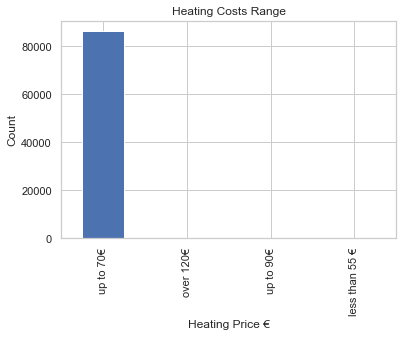

In [146]:
heating_binning['binned_heating'].value_counts().plot(kind='bar')
plt.title('Heating Costs Range')
plt.xlabel('Heating Price €')
plt.ylabel('Count')
plt.show()

<h3> Combining Categories </h3>

In [147]:
#let’s import our data and see the counts for each heating category
heats = housing['heatingType'].value_counts()
heats

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc56df01310>,
 [Text(-0.25949612279815787, 1.068953582833569, ''),
  Text(-0.7470254166827288, -0.8074360821947428, ''),
  Text(-0.13030565993229837, -1.0922547482110612, ''),
  Text(0.45739667340925816, -1.0003940639338804, ''),
  Text(0.8913836887872342, -0.6445425659830881, ''),
  Text(1.0485267161480334, -0.3325533423735534, ''),
  Text(1.078503013419915, -0.2164052911648952, ''),
  Text(1.0904460104169873, -0.14466339677221626, ''),
  Text(1.095996438635226, -0.09376463351872844, ''),
  Text(1.0984520415029038, -0.058336202465564, ''),
  Text(1.099600776719438, -0.029633289355194287, ''),
  Text(1.0999505605829527, -0.010429011134739466, ''),
  Text(1.0999970188811237, -0.002560947606074102, '')])

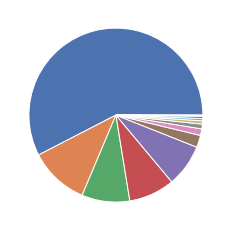

In [148]:
#Let's plot it in a pie chart
plt.pie(heats)

In [149]:
#We are grouping every category bellow 5000 as 'other'
heating_mask = tidy_housing_cleaned.isin(heats[heats < 5000].index)

In [150]:
housing['heatingType'].replace(heats[heats<5000].index,"others",inplace=True)

In [151]:
#let’s import our data and see the counts for each heating category
heats = housing['heatingType'].value_counts()
heats

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
others                              8428
oil_heating                         5042
Name: heatingType, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc56df489d0>,
 [Text(-0.25949612279815787, 1.068953582833569, 'central_heating'),
  Text(-0.7470254166827288, -0.8074360821947428, 'district_heating'),
  Text(-0.13030565993229837, -1.0922547482110612, 'gas_heating'),
  Text(0.45739667340925816, -1.0003940639338804, 'self_contained_central_heating'),
  Text(0.8913836887872342, -0.6445425659830881, 'floor_heating'),
  Text(1.0631315372911205, -0.2824027875517853, 'others'),
  Text(1.0972507554522062, -0.07772245273769401, 'oil_heating')])

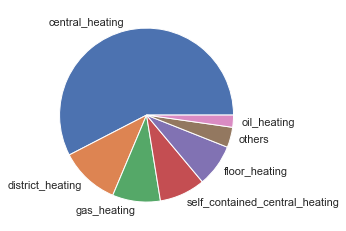

In [152]:
plt.pie(heats,labels=['central_heating','district_heating','gas_heating','self_contained_central_heating','floor_heating','others','oil_heating'])

<h3> Log Transformation </h3>

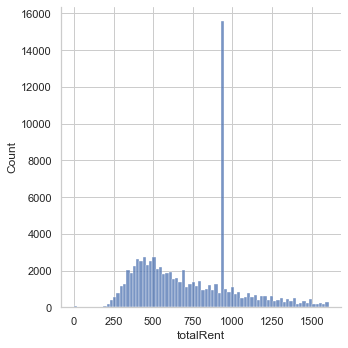

In [153]:
from sklearn.preprocessing import PowerTransformer
# log transform 
log_transform = PowerTransformer()
total_rent = tidy_housing_cleaned['totalRent']
oh_total_rent = housing_ohne_nan['totalRent']
sns.displot(total_rent)

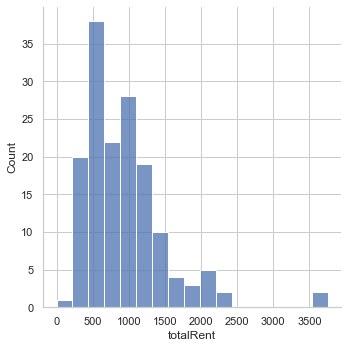

In [154]:
sns.displot(oh_total_rent)

In [155]:
#Let's check how the data is skewed
#Generally, if skewness is less than -1 or greater than 1, the distribution is highly skewed.
print("for the cleaned data set the skewness is "+str(total_rent.skew()),", and for the dropped missing values dataset the skewness is "+ str(oh_total_rent.skew()))

for the cleaned data set the skewness is 0.460048793640068 , and for the dropped missing values dataset the skewness is 2.0119301980834456


In [156]:
# apply log transformation to oh_total_rent 
log_rent_prices = np.log(total_rent)
oh_log_rent_prices = np.log(oh_total_rent)
print(log_rent_prices,oh_log_rent_prices)
# nan skew for oh_log_rent prices? *****

0         6.733402
2         7.170120
4         6.805723
5         6.845880
6         5.940171
            ...   
268831    6.429719
268833    6.845880
268837    6.824374
268838    6.243196
268845    6.813445
Name: totalRent, Length: 86370, dtype: float64 5111      7.346010
5248      6.956545
5727      7.117368
8340      6.975414
9226      6.809492
            ...   
265588    7.032624
267479    6.742881
267537    6.779922
267918    6.124683
268840    7.299554
Name: totalRent, Length: 154, dtype: float64


/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [157]:
#let's check the new skewness
print(log_rent_prices.skew(),oh_log_rent_prices.skew())

nan nan


In [158]:
#Let's test a log transformation for the totalrent and living space variables within the dropped missing values dataset 
housing_ohne_nan_num= housing_ohne_nan[['totalRent','livingSpace']]
#also let's test it with our clean dataset 
housing_num=tidy_housing_cleaned[['totalRent','livingSpace']]

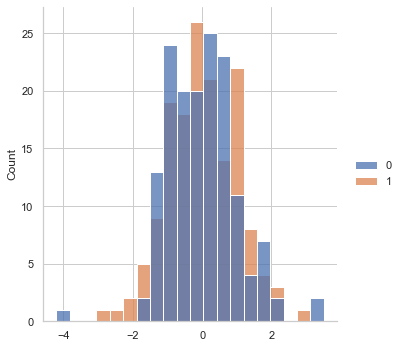

In [159]:
from sklearn.preprocessing import PowerTransformer
# log transform 
#and log transfor displot for totalRent and LivingSpace in the housing with out nan dataset 
log_transform = PowerTransformer()
sns.displot(log_transform.fit_transform(housing_ohne_nan_num))


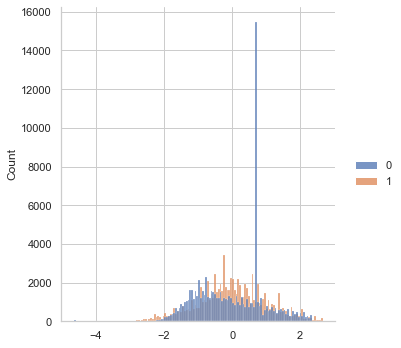

In [160]:
sns.displot(log_transform.fit_transform(housing_num))

<h3> Quantitative </h3>

In [161]:
housing.regio1.unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

In [162]:
#Quantitative and categorical variables

rent_nw = tidy_housing_cleaned.totalRent[tidy_housing_cleaned.regio1 == 'Nordrhein_Westfalen']
rent_sa = tidy_housing_cleaned.totalRent[tidy_housing_cleaned.regio1 == 'Sachsen']

In [163]:
mean_nw = np.mean(rent_nw)
mean_sa = np.mean(rent_sa)
#print the mean of Nordrhein Westfalen, the mean of Sachsen, and the difference between the two
print("the mean in Nordrheinwestphalen is: "+ str(mean_nw), ", and the mean in Sachsen is: "+ str(mean_sa)," the difference between both is: " + str((mean_nw - mean_sa)))

the mean in Nordrheinwestphalen is: 766.7996297082243 , and the mean in Sachsen is: 562.028636343186  the difference between both is: 204.7709933650383


In [164]:
median_nw = np.median(rent_nw)
median_sa = np.median(rent_sa)
#print the mean of Nordrhein Westfalen, the mean of Sachsen, and the difference between the two
print("the median in Nordrheinwestphalen is: "+ str(median_nw), ", and the median in Sachsen is: "+ str(median_sa)," the difference between both is:   " + str((median_nw - median_sa)))

the median in Nordrheinwestphalen is: 770.0 , and the median in Sachsen is: 480.0  the difference between both is:   290.0


<AxesSubplot:xlabel='totalRent', ylabel='regio1'>

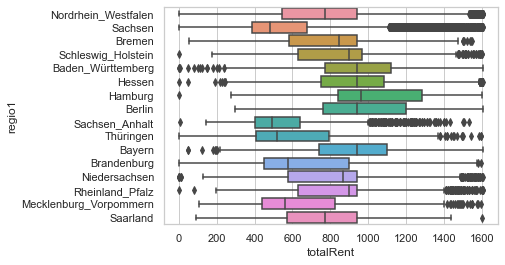

In [165]:
# let's take a look at the spread with a Side-by-side box to better see if this difference is considered small or large 
sns.boxplot(data = tidy_housing_cleaned, x = 'totalRent', y= 'regio1')
# the boxes barely overlap, the middle 50% of rent are different between the Bundesländer 

<p> there are however some Bundesländer where the 50% middle are similiar, like Bayern and Berlin, Sachsen Anhalt and Mecklenburg Vorpommern and Hessen and Hamburg. Sachsen has a lower mean than the others but also it has many outliers </p>

(0.0, 2500.0)

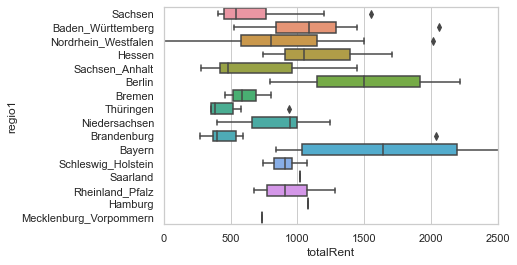

In [166]:
#Let's check the graph for the data without missing values dataset
sns.boxplot(data = tidy_housing_nan, x = 'totalRent', y= 'regio1')
plt.xlim(0, 2500)

<h4>Quantitative variable and non binary variable </h4>

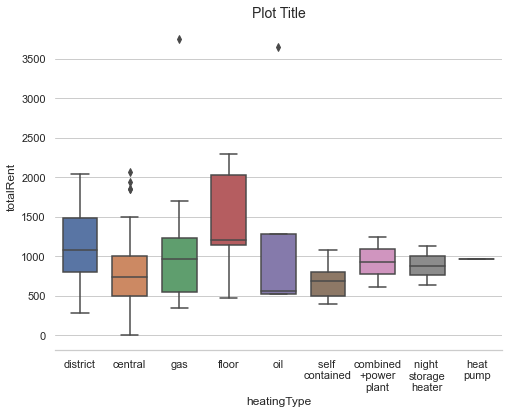

In [167]:
#sns.set(style='whitegrid')
#fig,ax = plt.subplots(figsize=(8,8))
#g = sns.boxplot(data=housing_ohne_nan,width=0.7)
#plt.title('Plot Title', fontsize=14)
#plt.xlabel('x title')
#remove top and right borders
#sns.despine()
#plt.xlim([1,14])
#plt.xticks
#plt.tight_layout()
#--------------#
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=housing_ohne_nan, x='heatingType', y='totalRent',width=0.7)
plt.title('Plot Title', fontsize=14)
#X tick-labels
x=[0,1,2,3,4,5,6,7,8]
xvalues = ['district', 'central', 'gas',
       'floor', 'oil', 'self \ncontained',
       'combined\n+power\nplant', 'night \nstorage\nheater',
       'heat\npump']
#set xvalues as xtick values
plt.xticks(x,xvalues)


#remove all borders except bottom
sns.despine(top=True,
            right=True, 
            left=True,
            bottom=False)

    


We can see how the houses with oil heating have the cheapest rent, whereas the one with floor heating are the most expensive ones, the ones with district heating are the second more expensive ones with a mean just above the 1000€.

<h4>Associations: Two Quantitative variables </h4>

Text(0, 0.5, 'Area (Square meter)')

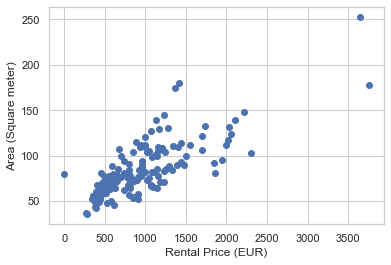

In [168]:
plt.scatter(x=housing_ohne_nan.totalRent, y= housing_ohne_nan.livingSpace)
plt.xlabel('Rental Price (EUR)')
plt.ylabel('Area (Square meter)')


Text(0.5, 1.0, 'Scatter rent price vs property area')

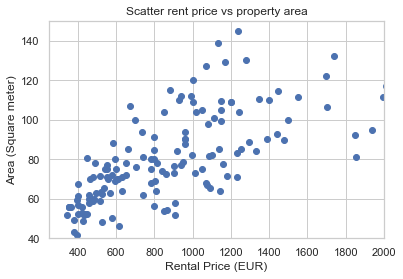

In [175]:
# plt.axis() [minimum x-value, maximum x-value, minimum y-value, maximum y-value]
plt.scatter(x=housing_ohne_nan.totalRent, y= housing_ohne_nan.livingSpace)
plt.xlabel('Rental Price (EUR)')
plt.ylabel('Area (Square meter)')
plt.axis([250,2000,40,150])
plt.title('Scatter rent price vs property area')

In [169]:
#covariance: a positive covariance indicates that a larger value of one variable is associated with a larger value of the other
cov_mat_price_m = np.cov(housing_ohne_nan.totalRent,housing_ohne_nan.livingSpace)
print(cov_mat_price_m)

[[308568.77358814  13299.33829401]
 [ 13299.33829401    936.97524699]]


In [170]:
#correlation is a scaled form of covariance, highly associated variables with a positive linear relationship will have a correlation close to 1.
from scipy.stats import pearsonr
corr_price_m, p = pearsonr(housing_ohne_nan.totalRent,housing_ohne_nan.livingSpace)
print(corr_price_m)

0.7821498874433068


<p> Generally, a correlation larger tha about .3 indicates a linear association. A correlation greater than about .6 suggests a strong linear association </p>

In [171]:
# How far from the population mean could this sample mean reallistically be? 

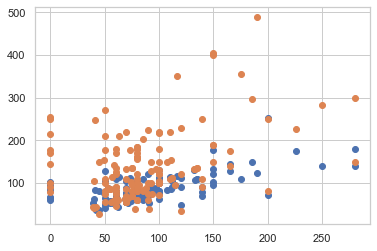

In [174]:
#Data Visualization
# TEST ******
plt.scatter(housing_ohne_nan.heatingCosts, housing_ohne_nan.livingSpace)
plt.scatter(housing_ohne_nan.heatingCosts, housing_ohne_nan.serviceCharge)

In [217]:
housing.regio1.unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

In [228]:
tidy_housing_cleaned['regio1'] = tidy_housing_cleaned['regio1'].replace(to_replace=['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'], value=['NW','RP','SN','HB','SH','BW','TH','HE','NI','BY','HH','ST','MV','BE','BB','SL'])

In [ ]:
housing['regio1'] = housing['regio1'].replace(to_replace=['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'], value=['NW','RP','SN','HB','SH','BW','TH','HE','NI','BY','HH','ST','MV','BE','BB','SL'])

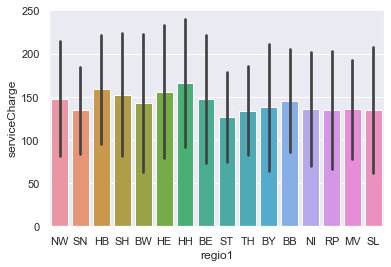

In [229]:

ax=sns.barplot(data=tidy_housing_cleaned,
           x= 'regio1',
           y='serviceCharge',
           ci='sd')

#specfiy axis labels
plt.xlabel=(['NW','RP','SN','HB','SH','BW','TH','HE','NI','BY','HH','ST','MV','BE','BB','SL'])
       

<AxesSubplot:xlabel='regio1', ylabel='totalRent'>

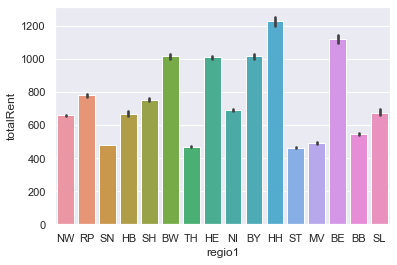

In [231]:
ax=sns.barplot(data=housing,
           x='regio1',
           y='totalRent',
           estimator=np.median)


We can see here how the highest rents are to be found in Hessen followed by Berlin.Bayern, Niedesachsen and Badenwüttenberg have pretty similar values. Sachsen Anhalt and Mecklemburg Vorpommer would be the most affordable ones in Germany. 

Text(0.5, 1.0, 'Number of Announments per Bundeland')

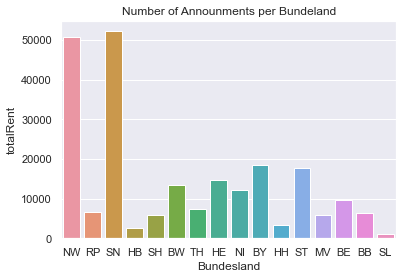

In [239]:
housing.rename(columns = {'regio1':'Bundesland'}, inplace = True)
# number of announces appear in ever Bundesland 
ax=sns.barplot(data=housing,
           x='Bundesland',
           y='totalRent',
           estimator=len)
plt.title('Number of Announments per Bundeland')


<AxesSubplot:xlabel='Bundesland', ylabel='totalRent'>

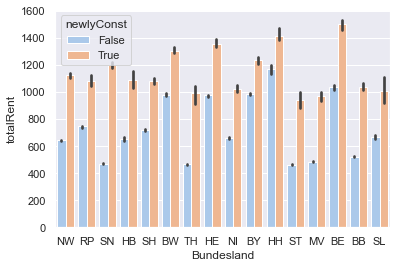

In [240]:
sns.barplot(data=housing,
           x='Bundesland',
           y='totalRent',
           hue='newlyConst',
           estimator=np.median)

We can see here how there is a rent difference between newly constructed properties and existing ones in Germany. For example for Nordrheinwestphalen this difference would be of about 400€ monthly rent. In the case of Hesssen which has the highest mean the difference is a bit shorter of about 200€ monthly.

No handles with labels found to put in legend.


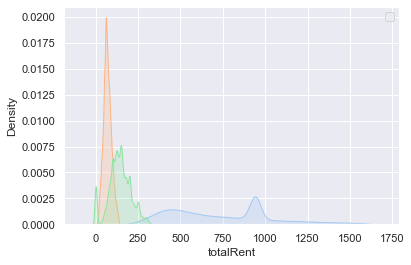

In [182]:
#KDE Plots
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.kdeplot(tidy_housing_cleaned.totalRent, shade=True)
sns.kdeplot(tidy_housing_cleaned.livingSpace, shade =True)
sns.kdeplot(tidy_housing_cleaned.serviceCharge, shade= True)
plt.legend()


<h4>Violin Plots<h4>

<AxesSubplot:xlabel='regio1', ylabel='totalRent'>

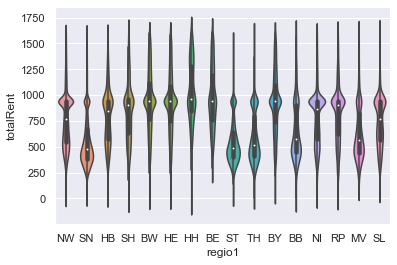

In [245]:
sns.violinplot(data=tidy_housing_cleaned, x='regio1', y='totalRent')

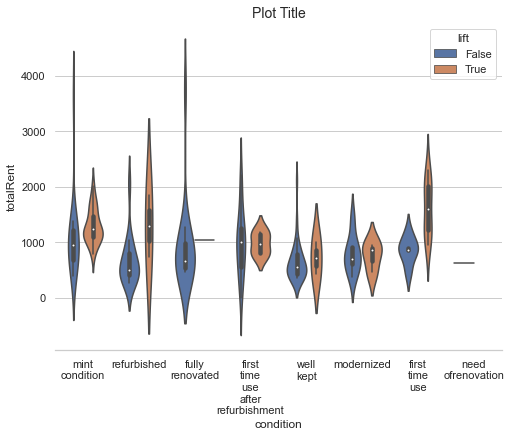

In [250]:
#sns.violinplot(data=housing_ohne_nan, x='condition', y='totalRent',hue='lift')


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
g = sns.violinplot(data=housing_ohne_nan, x='condition', y='totalRent',hue='lift',width=0.7)
plt.title('Plot Title', fontsize=14)
#X tick-labels
x=[0,1,2,3,4,5,6,7]
xvalues = ['mint\ncondition', 'refurbished', 'fully\nrenovated',
       'first\ntime\nuse\nafter\nrefurbishment', 'well\nkept', 'modernized',
       'first\ntime\nuse', 'need\nofrenovation']

#set xvalues as xtick values
plt.xticks(x,xvalues)


#remove all borders except bottom
sns.despine(top=True,
            right=True, 
            left=True,
            bottom=False)


[Text(0, 0, 'mint_condition'),
 Text(1, 0, 'refurbished'),
 Text(2, 0, 'fully_renovated'),
 Text(3, 0, 'first_time_use_after_refurbishment'),
 Text(4, 0, 'well_kept'),
 Text(5, 0, 'modernized'),
 Text(6, 0, 'first_time_use'),
 Text(7, 0, 'need_of_renovation')]

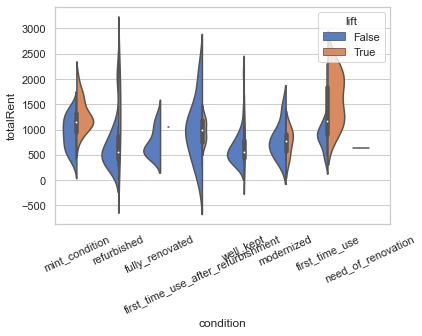

In [251]:
ax = sns.violinplot(x="condition", y="totalRent", hue="lift",
                    data=housing_ohne_nan[housing_ohne_nan.totalRent<2500], palette="muted", split=True, scale='count',scale_hount=False)
ax.set_xticklabels(labels=['mint_condition','refurbished', 'fully_renovated',
       'first_time_use_after_refurbishment', 'well_kept', 'modernized',
       'first_time_use', 'need_of_renovation'], rotation=25)

<h2> Machine Learning </h2>

<h3> Linear Regression </h3>

In [187]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [188]:
# Test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(housing_ohne_nan.totalRent, housing_ohne_nan.livingSpace)

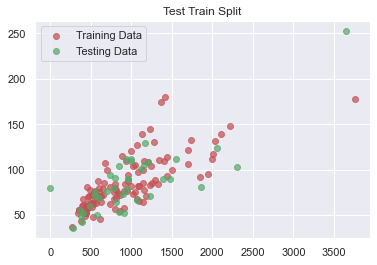

In [189]:
# Test train split visualization
plt.scatter(X_train, y_train, label = 'Training Data', color = 'r', alpha=.7)
plt.scatter(X_test, y_test, label= 'Testing Data', color='g',alpha = .7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [190]:
# Create linear model and train it
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)


LinearRegression()

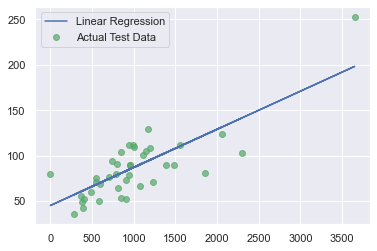

In [191]:
# Use model to predict on TEST Data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plot prediction line against actual test data

plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color = 'g', alpha =.7)
plt.legend()
plt.show()

In [192]:
# Predict square  meters of a 600 euros rent 
LR.predict(np.array([[600]]))[0]

70.20806461438706

In [193]:
#Score this model
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.6496367806372658

<h3> Multiple Linear Regression </h3>

In [194]:
df = pd.DataFrame(housing_ohne_nan)
tx = df[['serviceCharge', 'livingSpace', 'lift','floor','heatingCosts','newlyConst','balcony','yearConstructed','noParkSpaces','hasKitchen','noRooms','floor','numberOfFloors','garden']]
ty = df[['totalRent']]
tx_train, tx_test, ty_train, ty_test = train_test_split(tx, ty, train_size = 0.8, test_size = 0.2, random_state=6)

In [195]:
mlr = LinearRegression()
mlr.fit(tx_train,ty_train)
y_predicted = mlr.predict(tx_test)
zulo_test = [[100,30,False,3,200,True,False,1970,2,True,3,1,5,False]]
predict = mlr.predict(zulo_test)
print("Predicted rent: $%.2f" % predict)

Predicted rent: $688.65


Text(0.5, 1.0, 'Actual Rent vs Predicted Rent')

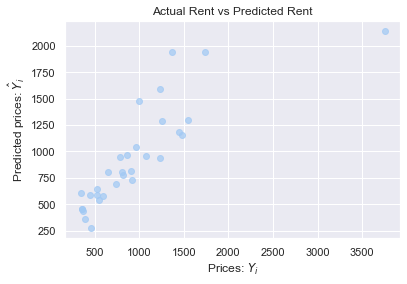

In [196]:
lm = LinearRegression()
model = lm.fit(tx_train, ty_train)
y_predict = lm.predict(tx_test)
plt.scatter(ty_test, y_predict, alpha=0.72)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

In [197]:
# Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -2 will impact more than a coefficient of 0.5, with the former impacting prices negatively and latter positively
print(mlr.coef_)

[[ 1.36560200e+00  1.04277180e+01  3.03167924e+01  2.33089446e+01
   9.26109413e-01  2.85421670e+02  1.29243748e+02 -2.39348156e-01
  -7.97529012e+00  1.66069558e+02 -6.44186736e+01  2.33089446e+01
   1.56662642e+01  4.98472868e+01]]


In [198]:
#Remove some of the features that don't have strong correlations to check if the scores improve **




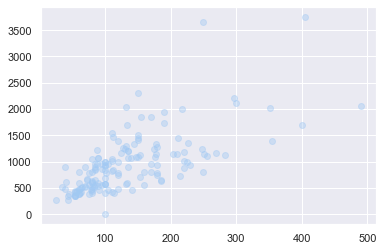

In [199]:
# Let's Check positive, negative or no relationship in correlation against rent 
plt.scatter(df[['serviceCharge']], df[['totalRent']],alpha = 0.4)

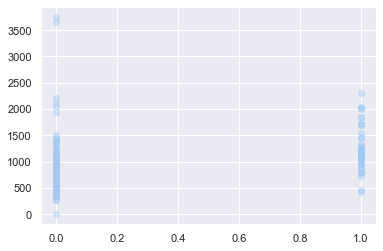

In [200]:
plt.scatter(df[['lift']], df[['totalRent']],alpha = 0.4)

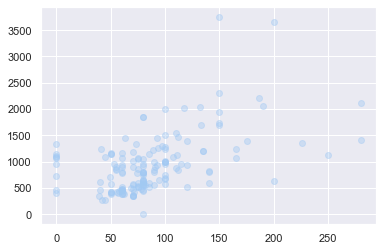

In [201]:
plt.scatter(df[['heatingCosts']], df[['totalRent']],alpha = 0.4)

In [202]:
print("Train score:")
print(mlr.score(tx_train,ty_train))

Train score:
0.768438138132206


In [203]:
print("Test score:")
print(mlr.score(tx_test,ty_test))

Test score:
0.6943807730887952


Text(0.5, 1.0, 'Residual Analysis')

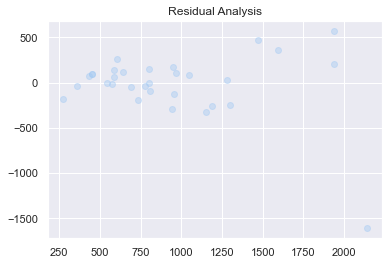

In [204]:
residuals = y_predict - ty_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

<h3> Logistic Regression </h3>

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [206]:
X_train, X_test, y_train, y_test = train_test_split(housing_ohne_nan.livingSpace, housing_ohne_nan.balcony)

In [207]:
#Perform Logistic Regresion
log_reg = LogisticRegression()
log_reg.fit(X_train.values.reshape(-1,1), y_train.values)


LogisticRegression()

In [208]:
y_pred = log_reg.predict(X_test.values.reshape(-1,1))

In [209]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 0,  9],
       [ 1, 29]])

<p> We would have 9 false positives and 30 true negatives in our confusion Matrix </p>

<h4>Gradient Boosting (GBM)</h4>

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

df_train=housing

In [282]:
var_columns = [c for c in tidy_housing_cleaned.columns if c not in ['regio1','heatingType','telekomTvOffer','telekomHybridUploadSpeed','newlyConst','balcony','picturecount','pricetrend','telekomUploadSpeed','scoutid','firingTypes','hasKitchen','geo_bln','cellar','yearConstructedRange','houseNumber','geo_krs','condition','interiorQual','petsAllowed','street','streetPlain','lift','baserentRange','typeOfFlat','geo_plz','thermalChar','noRoomsRange','garden','livingSpaceRange','regio2','regio3','description','facilities','heatingCosts','energyEfficiency','lastRefurbish','electricityBasePrice','electricityKwhPrice','date','livingSpace','binned_heating']]
X = df_train.loc[:, var_columns]
y= df_train.loc[:, 'livingSpace']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((215080, 9), (53770, 9), (215080,), (53770,))

In [285]:
model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)
model_gbm.fit(X_train, y_train)


ValueError: could not convert string to float: 'C'

In [284]:
len(model_gbm.estimators_)

AttributeError: 'GradientBoostingClassifier' object has no attribute 'estimators_'

In [ ]:
y_train_pred = model.gbm.predict_proba(X_train)[:,1]
y_valid_pref = model.gbm.predict_proba(X_valid)[:,1]
print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_valid, y_valid_pred)))


<h5> Look at Performance with respect to number of trees </h5>

In [ ]:
y_train_pred_trees = np.stack(list(model_gbm.staged_predict_proba(X_train)))[:,:,1]
y_valid 

--------------------------

In [210]:
#Let's explore a bit the binary columns

# have the NAAns and similar been taken out? only 50% have kitchen? 

housing_prop= housing[[ 'newlyConst', 'balcony',  'hasKitchen', 
       'cellar',  'lift',  'garden',]]
housing_prop.apply(pd.Series.value_counts)

,newlyConst,balcony,hasKitchen,cellar,lift,garden
False,247679,103116,176794,96615,205528,216093
True,21171,165734,92056,172235,63322,52757


In [211]:
#What are the possibilities for heatingType

housing_subset['heatingType'].value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

In [212]:
housing_subset['serviceCharge'].fillna(150, inplace =True)

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [255]:
from scipy.stats import norm
#ax = sns.displot(housing_subset.serviceCharge, fit=norm, kde=False)

In [ ]:
housing.dropna(subset= ['totalRent','serviceCharge','lastRefurbish'])


In [ ]:
housing[housing.isnull().any(axis=1)]

In [ ]:
numerical= ['serviceCharge','telekomUploadSpeed','totalRent','yearConstructed','noParkSpaces','livingSpace','noRooms'] 
categorical = ['description','newlyConst','firingTypes','geo_bln','condition','interiorQual','typeOfFlat']

In [ ]:
bundesland= housing.groupby(['regio1']).date.count().reset_index()
bundesland_sorted= bundesland.sort_values(by=['date'], ascending= False).reset_index(drop=True)

In [ ]:
fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(2,1,1)
ax1.bar(bundesland_sorted['regio1'], bundesland_sorted['date'], color ='#ff944d')
plt.xticks(rotation=72)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.set_title('Property announcements published by german Bundesländer', fontsize = 20)
ax1.set_xlabel('Bundesländer', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)

In [ ]:
mask = (housing.regio1 == 'Nordrhein_Westfalen') & (housing.typeOfFlat == 'apartment')
housing1= housing[mask]
housing1 = housing1[['regio1', 'heatingType', 'totalRent','yearConstructed','noParkSpaces', 'baseRent', 'livingSpace','noRooms', 'numberOfFloors','regio3', 'heatingCosts']]
housing1.shape

<h2> 4. Exploratory Data Analysis (EDA) </h2>


In [ ]:
housing

In [ ]:
housing.describe()

In [ ]:
data_min, data_max = rent_costs.min(), rent_costs.max()
quartiles = percentile(rent_costs, [25, 50, 75])
#print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

In [ ]:
mean_m2=housing.livingSpace.mean()
print("The square meters mean is: "+mean_m2)
median_m2=housing.livingSpace.median()
mode_m2=housing.livingSpace.mode()
variance_m2= np.var(housing.livingSpace)
std_m2=np.std(housing.livingSpace)
print(mean_m2,median_m2,mode_m2)
print(variance_m2,std_m2)

In [ ]:
sns.displot(housing.electricityKwhPrice)

In [ ]:
housing_year= housing[(housing.yearConstructed>1800)]
sns.displot(housing_year)

In [ ]:
sns.displot(housing.baseRentRange)

In [ ]:
housing.regio1.head()

In [ ]:
housing_prueba = housing.loc[(housing['regio1']=='Nordrhein_Westfalen')  & (housing['regio2']=='Münster') & (housing['regio3']=='Kreuzviertel') , ['serviceCharge','totalRent']]
housing_prueba.head()

In [ ]:
sns.histplot(housing_prueba.totalRent)

In [ ]:
housing_berlin = housing.loc[(housing['regio1']=='Berlin') & (housing['regio2']=='Berlin'), ['serviceCharge','totalRent']]
housing_berlin.head()

In [ ]:
sns.histplot(housing_berlin.totalRent)

In [ ]:
sns.hisplot(housing['totalRent'])


In [ ]:
sns.histplot(housing.totalRent[totalRent >=400])

In [ ]:
housing2= housing[(housing.totalRent < 2000) & (housing.totalRent>0)]
housing2= housing2[(housing2.livingSpace <150)& (housing2.livingSpace>0)]
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent")


In [ ]:
# Let’s try using a random 5% of the data: 
perc = 0.05
housing_sub = housing2.sample(n = int(housing2.shape[0]*perc))
sns.scatterplot(data=housing_sub, x="livingSpace", y="totalRent")


In [ ]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent", s=10)

In [ ]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent", hue="typeOfFlat", style="typeOfFlat")

In [ ]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent",alpha=0.15)


In [ ]:
g1 = sns.lmplot(x="totalRent", y="livingSpace", data=housing2,line_kws={'color': 'black'}, lowess=True)


We can watch how the price has a linear relationship between total rent and living space, however the step of the curv changes when the living space is over 60 square meters 

In [ ]:
sns.lmplot(x='livingSpace', y='totalRent', data = housing2, line_kws={'color': 'black'}, lowess=True)

In [ ]:
g = sns.lmplot(x="totalRent", y="livingSpace", hue="regio1", col="regio1",
               data=housing2, col_wrap=4,height=4, aspect=.4, x_jitter=.1)

In [ ]:
sns.scatterplot('newlyConst','hasKitchen',data=housing)

We can see how Bayern and Nordrhein Westphalen has the more variance between the line and the points to each side 

In [ ]:
corr_matrix = housing_ohne_nan.corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':10},cmap='Purples')
plt.title('Matrix of Correlations between variables', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation = 45)
plt.yticks(rotation =45)
plt.show()

In [ ]:
corr_matrix2= tidy_housing_cleaned.corr()

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix2, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':10},cmap='Purples')
plt.title('Matrix of Correlations between variables', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation = 45)
plt.yticks(rotation =45)
plt.show()

In [ ]:
housing_year_con= housing[(housing.totalRent < 2200) & (housing.yearConstructed>1800)]
sns.scatterplot(data=housing_year_con, x="yearConstructed", y="totalRent",alpha=0.15)

#sns.scatterplot(x=housing['yearConstructed'],y=housing['totalRent'])

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix2, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':15},cmap='Purples')

In [ ]:
print(housing.typeOfFlat.unique())

yearConstructed maximum value is 2090 which hasnt yet come

In [ ]:
rent_cost=housing['totalRent']

In [ ]:
rent_costs=rent_cost[~pd.isnull(rent_cost)]


In [ ]:
fig, axs = plt.subplots(figsize=(7,3), dpi=100)
plt.subplot(1,2,1)
sns.histplot(housing['totalRent']).set_title('Distibution of Rent Prices', weight='bold')

In [ ]:
sns.histplot(
    housing.baseRent,
    x="H", hue="date",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [ ]:

plt.figure(figsize=[12,4])
sns.distplot(housing['yearConstructed'], color='red')
plt.title('Year of Construction')
plt.show()

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing['totalRent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='totalRent', ylabel='date');

In [ ]:
sns.distplot(housing['totalRent'], bins=3, kde=True, rug=True)


Separation of data into training and test sets

In [ ]:
X = housing.drop(['totalRent'],axis =1)
y= housing['totalRent']

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=72,test_size= 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# Decision Tree Model.
reg_tree = DecisionTreeRegressor(random_state = 42)
reg_tree.fit(X_train, y_train)

y_tree_train_predict = reg_tree.predict(X_train)
y_tree_test_predict = reg_tree.predict(X_test)

tree_r2_train = r2_score(y_train, y_tree_train_predict)
tree_r2_test = r2_score(y_test, y_tree_test_predict)

print('Maximum depth of the model:', reg_tree.get_depth())